# Notebook for running ANN on Ireland (CER) data

 New config - all functions moved to a separate module 

Configure Colab 

In [1]:
# mount my google drive to colab VM (authorize VM session)
from google.colab import drive
drive.mount('/content/drive',force_remount=True)


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
# list my Google Drive colab folder contents
!ls "drive/My Drive/ColabProject"


'Colab-IrlANN Run1.zip'		 ColabProjectInputs_19July.zip
 ColabIRLProjectRun2.zip	 ColabProjectInputs_23July.zip
 ColabLCLProjectRun2.zip	 mscprojectcoding
 ColabLCLProject.zip		 notebooks-inputVersions
 ColabProjectInputs_16July.zip	 project_data


In [3]:
#list VM drive contents
!pwd
!ls 

/content
drive  sample_data


In [4]:
inputZipFileName = "ColabProjectInputs_23July.zip"
#inputFilePathName = "drive/My Drive/ColabProject/"
#fullInputName = inputFilePathName+inputZipFileName


In [5]:
!cp "drive/My Drive/ColabProject/ColabProjectInputs_23July.zip" /content

In [ ]:
#!cp  "drive/My Drive/ColabProject/mscprojectcoding/FM_MScProject_LoadForecasting_Module.py" /content

In [6]:
!ls 

ColabProjectInputs_23July.zip  drive  sample_data


In [7]:
# unzip to colab VM and check contents
from zipfile import ZipFile
with ZipFile(inputZipFileName,'r') as myZipFile:
  myZipFile.extractall()
  print('done')

done


In [8]:
!ls

ColabProjectInputs_23July.zip  mscprojectcoding  sample_data
drive			       project_data


In [ ]:
# only if need to import any files not in zipfile
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [9]:
# import  module containing all my functions 
import mscprojectcoding.FM_MScProject_LoadForecasting_Module as FMmodule

#install any other packages not in colab defaults
!pip install plot_keras_history


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


  Created wheel for plot-keras-history: filename=plot_keras_history-1.1.23-cp36-none-any.whl size=6405 sha256=5e14867e7868e337442c660672cd67878d70d08805f0ae6738b7274b5ca168c9
  Stored in directory: /root/.cache/pip/wheels/c0/78/33/da5ed769fab5587fcdae95271e8d19106e3b92b3ae2d46382d
  Created wheel for sanitize-ml-labels: filename=sanitize_ml_labels-1.0.11-cp36-none-any.whl size=6528 sha256=b038368b2a7a793f6443cc568cb68f0d8e031862602c807214a13102c9d69c98
  Stored in directory: /root/.cache/pip/wheels/f3/6c/b3/5773badc2f0aaeabcc660207bbbba9ddebf33454be077feea0
Successfully built plot-keras-history sanitize-ml-labels


In [10]:
# force reimport of module after edits/updates to functions in PyCharm 
import importlib
importlib.reload(FMmodule)

<module 'mscprojectcoding.FM_MScProject_LoadForecasting_Module' from '/content/mscprojectcoding/FM_MScProject_LoadForecasting_Module.py'>

In [11]:
#import all my functions

from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  annPlot                    # plots ANN model forecast for specified windows 
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  annPlotInputs              # shift train&test forecasts to align with hr/day indices ie unpack into actual time bands - similar to shiftInputs but returns dictionary of np arreays for test AND train wondows
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  create_MLP                 # create MLP for ANN
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  create_TrainPredictSeries  # split Train and Test numpy arrays for MLR 
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  create_TrainPredict_df     # split Train and Test data into dfs for ANN - standard version
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  create_TrainPredict_df_V2  # split Train and Test data into dfs for ANN - version with day of week classifier scaling
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  create_save_folder         # create folder name for saving results
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  cv_calc                    # Error calculation - coeff of variance error
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  findkeys                   # get all keys and subkeys of nested dictionary 
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  fullprint                  #change num lines to print of a numpy array without changing default
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  get_NPminmax_values        # get max value in each col OR full np array
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  get_NaN_stats              # get stats for NaNs in each column
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  get_TrainTestSeries        # for ANN inputs ?
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  get_data_range
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  get_errors                 # compute errors for supplied models, hardwired for MAPE,MAE,CV,RMSE,NRMSE errors
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  get_limits                 # get x,y limits for plot axis
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  get_save_folderName        # generate folder name for saving results files
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  get_uniques                # get unique values from dataframe columns or pd.series?
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  historyPlot                # plots loss function from ANN MLP history object
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  lrmodel_r2                 # 
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  mae_calc                   # Error calculation - mean avg error
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  mape_calc                  # Error calculation - Mean avg percentage error
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  mlr_predict                # returns forecast given MLR regression model
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  mlr_train                  # returns MLR regression model 
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  nrmse_calc                 # Error calculation - normalised root mean square error
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  peristModelPlot            # plot persistence model series
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  persistDataWindowed        # generates persistence models with variable window size search
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  persistScatterPlot         # plot peristance models 
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  piecewise_linear           # comput piecewise linear function given slopes, intercept etc
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  plotSectionOfLoadProf      # redundant? used in MLR scripts
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  plot_allFeatures           # plot selected columns of numpy array 
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  plot_errors                # plot avg errors from errors dictionary (eg for all MLR models)
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  plot_forecast              # plot forecast for specified tiime periods (MLR only?)
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  pltDefaults                # set rc params (matplotlib) plot defaults
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  populate_AllFeatures       # populate numpy array for MLR 
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  r2_get                     # persistence model r2 calculations
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  r2_histogram               # plotting of r2 histogram for variable window search persistence model 
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  r2_histogramV2             # similar but tailored for publication plots (most series greyed out)
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  randomUserGroupAggregate   # form group aggregate load df for random userD grps created by randomUserGroups
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  randomUserGroups           # form random userID clusters of size N  
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  removeNestings
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  rmse_calc                  # Error calculation - root mean sq error
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  round_down                 # round a number down to nearest decade (0.1,1,10,100 etc) 
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  round_up                   # round a number up to nearest decade (0.1,1,10,100 etc)
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  sbn_plotErrors             # plot MLR,ANN model errors as boxplot, swarm plot - V1 : plot for various error types - ordered by error type , not model type
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  sbn_plotErrors_V2          # plot MLR,ANN model errors as boxplot, swarm plot - V2 : Version 2 :plots one error type with subplot for each model
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  set_dowSeries              # set day of week classifier channels given a dayOfWeek classifier list
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  set_envSeries              # set environment series to be used in MLR and/or ANN 
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  set_loadSeries             # select which load series to use in MLR and/or ANN 
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  shiftInputs                # shift models/forecast series to align with hr/day indices of load ie unpack into actual time bands
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  show_mem_usage             # shows total memory usage
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  stackplot_of_forecast      # plots time window of all passed model forecasts,loads - load profiles stacked by calendar day
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  get_errorDictionary        # load error dictionary from disk given path name
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  flip_dictionary            # invert dictionary nest levels for plotting results (MLR and/or ANN)
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  merge_TrainTestErrors      # for ANN??
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  get_error_percentiles      # get specified percentiles from error dictionary (MLR, ANN)
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  getTrainTestSeriesNames    # generate list of train, test series names from eg loadSeries, envSeries dictionaries

In [12]:
# get list of all functions in module
#dir(FMmodule)

In [13]:
# import standard packages /modules etc : may not need all these..

import matplotlib.pyplot as plt     # pyplot = collection of command style functions that make matplotlib work like MATLAB, uses numpy arrays internally
import matplotlib.colors as colors2  # module for converting numbers or color arguments to RGB or RGBA
import matplotlib.cm as cmx         # built-in colour maps and utilities; Any colormap can be reversed by appending '_r', so 'RdYlGn_r' is the reversed Red-Yellow-Green colormap
import matplotlib.mlab as mlab      # matlab compatible cmd names
import matplotlib.ticker as mtick   # configurable tick locating and formatting, used by Axis class
import matplotlib.dates as mdates    # useful for getting tick label as siimple dates

import matplotlib.patches as mpatches  # draw geometric shapes 
from matplotlib.patches import Rectangle
import matplotlib.lines as mlines      # 2D lines
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator,MaxNLocator) # needed for eg integer tick marks etc

import seaborn as sns                  # data visualization library based on matplotlib             

%matplotlib inline

import math                            # module provides access to the mathematical functions defined by the C standard
import csv
import sys
import pandas as pd
import numpy as np
import time                 
import re                              # provides regular expression matching operations 
import random
import os

from six.moves import cPickle as pickle   # cPickle is faster as written in C but merged with Pickle in Python 3.x ..

import numpy.polynomial.polynomial as poly  # polynomial functions incl fitting , etc

from sklearn.cluster import KMeans    # Sklearn = SciPy ML toolkit 
from sklearn import linear_model            # Estimated coefficients for linear regression
#from sklearn.model_selection import train_test_split 
#from sklearn.linear_model import LinearRegression
from sklearn import metrics

from scipy.interpolate import interp1d      # Interpolate a 1-D function.
from scipy.spatial.distance import cdist, pdist       # Pairwise distances between observations in n-dimensional space.
from scipy.spatial.distance import squareform         # Convert a vector-form distance vector to a square-form distance matrix, and vice-versa
from scipy.cluster.hierarchy import dendrogram, linkage   # hierarchical/agglomerative clustering 
from scipy.cluster.hierarchy import fcluster              # Form flat clusters from the hierarchical clustering
from scipy import stats                                   # statistical functions https://docs.scipy.org/doc/scipy/reference/stats.html
from scipy import optimize             # commonly used optimization algorithms eg least squares minimization, curve fitting , etc

import json
from datetime import datetime, timedelta 

from itertools import chain           # for iterating through list (of lists) of dictionaries etc
from pathlib import Path              # file/folder paths etc

import requests                              # url requests
from plot_keras_history import plot_history

import importlib

In [14]:
# conda install -n fm_ANN tensorflow  keras (i.e. install into my python3.6 env)

import tensorflow as tf
import keras

from keras.models import Sequential
from keras.layers import Dense, LSTM  #Dropout, Flatten, Conv2D, MaxPPooling2D, etc
from sklearn.preprocessing import MinMaxScaler

from keras.utils.vis_utils import plot_model
import pydot 

#warnings because my numpy is 1.18 (ignore for now as don't want to downgrade to 1.16)

Using TensorFlow backend.


In [15]:
# SET SEABORN DEFAULTS

# https://seaborn.pydata.org/tutorial/aesthetics.html
# https://seaborn.pydata.org/generated/seaborn.set_style.html
# https://matplotlib.org/tutorials/introductory/customizing.html

#sns.set_style() # (style=None, rc=None) Set the aesthetic style of the plots. 
sns.set_style(style="whitegrid",
              rc= 
             {'axes.linewidth': 1, 
               'axes.edgecolor':'black', 
               'xtick.direction': 'out',
               'xtick.major.size': 4.0, 
               'ytick.direction': 'out', 
               'ytick.major.size': 4.0, 
               'axes.facecolor': 'white',
               'grid.color': '.8', 
               'grid.linestyle': u'-', 
               'xtick.minor.size': 3.0, 
               'ytick.minor.size': 3.0, 
               'grid.linewidth': 0.})        
sns.axes_style()                  # returns current settings (default axes styles)

plt.style.use('seaborn')     # switch to seaborn style
# plot code
# ...

plt.style.use('default')     # switches back to default matplotlib style
# plot code
# ...

# to see all available styles
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [16]:
# to avoid warning message 
#C:\Users\fmurphy\Miniconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [17]:
# override some default print parameters
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', None)
#pd.set_option('display.max_colwidth',-1)

#np.set_printoptions(threshold=np.inf)
np.set_printoptions(threshold=2000)
np.set_printoptions(edgeitems=10)


In [18]:
# load hourly load data 
hourly_df = pd.read_pickle('./project_data/intermediateDataIreland/CER_Data_Step6.hourly_df.pkl')
hourly_df

,2010-01-01 00:00:00,2010-01-01 01:00:00,2010-01-01 02:00:00,2010-01-01 03:00:00,2010-01-01 04:00:00,2010-01-01 05:00:00,2010-01-01 06:00:00,2010-01-01 07:00:00,2010-01-01 08:00:00,2010-01-01 09:00:00,2010-01-01 10:00:00,2010-01-01 11:00:00,2010-01-01 12:00:00,2010-01-01 13:00:00,2010-01-01 14:00:00,2010-01-01 15:00:00,2010-01-01 16:00:00,2010-01-01 17:00:00,2010-01-01 18:00:00,2010-01-01 19:00:00,2010-01-01 20:00:00,2010-01-01 21:00:00,2010-01-01 22:00:00,2010-01-01 23:00:00,2010-01-02 00:00:00,2010-01-02 01:00:00,2010-01-02 02:00:00,2010-01-02 03:00:00,2010-01-02 04:00:00,2010-01-02 05:00:00,2010-01-02 06:00:00,2010-01-02 07:00:00,2010-01-02 08:00:00,2010-01-02 09:00:00,2010-01-02 10:00:00,2010-01-02 11:00:00,2010-01-02 12:00:00,2010-01-02 13:00:00,2010-01-02 14:00:00,2010-01-02 15:00:00,2010-01-02 16:00:00,2010-01-02 17:00:00,2010-01-02 18:00:00,2010-01-02 19:00:00,2010-01-02 20:00:00,2010-01-02 21:00:00,2010-01-02 22:00:00,2010-01-02 23:00:00,2010-01-03 00:00:00,2010-01-03 01:00:00,...,2010-12-29 22:00:00,2010-12-29 23:00:00,2010-12-30 00:00:00,2010-12-30 01:00:00,2010-12-30 02:00:00,2010-12-30 03:00:00,2010-12-30 04:00:00,2010-12-30 05:00:00,2010-12-30 06:00:00,2010-12-30 07:00:00,2010-12-30 08:00:00,2010-12-30 09:00:00,2010-12-30 10:00:00,2010-12-30 11:00:00,2010-12-30 12:00:00,2010-12-30 13:00:00,2010-12-30 14:00:00,2010-12-30 15:00:00,2010-12-30 16:00:00,2010-12-30 17:00:00,2010-12-30 18:00:00,2010-12-30 19:00:00,2010-12-30 20:00:00,2010-12-30 21:00:00,2010-12-30 22:00:00,2010-12-30 23:00:00,2010-12-31 00:00:00,2010-12-31 01:00:00,2010-12-31 02:00:00,2010-12-31 03:00:00,2010-12-31 04:00:00,2010-12-31 05:00:00,2010-12-31 06:00:00,2010-12-31 07:00:00,2010-12-31 08:00:00,2010-12-31 09:00:00,2010-12-31 10:00:00,2010-12-31 11:00:00,2010-12-31 12:00:00,2010-12-31 13:00:00,2010-12-31 14:00:00,2010-12-31 15:00:00,2010-12-31 16:00:00,2010-12-31 17:00:00,2010-12-31 18:00:00,2010-12-31 19:00:00,2010-12-31 20:00:00,2010-12-31 21:00:00,2010-12-31 22:00:00,2010-12-31 23:00:00
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1002,0.2340,0.0865,0.0555,0.1055,0.0915,0.0480,0.1230,0.1060,0.2745,0.4495,0.9495,0.3070,0.4260,0.2205,0.2310,0.3715,0.3215,0.4570,0.2980,0.1630,0.1360,0.1970,0.1590,0.1485,0.2045,0.1270,0.2015,0.1535,0.1695,0.1875,0.1480,0.1990,0.1440,0.2010,0.1210,0.2025,0.3000,0.2100,0.0405,0.1210,0.0410,0.1300,0.0320,0.5560,0.5235,0.6585,0.5845,0.6160,0.4895,0.0465,...,0.3365,0.3580,0.3915,0.0835,0.0630,0.0605,0.0605,0.0570,0.0510,0.0520,0.0480,0.0650,0.456,0.5615,0.4760,0.1090,0.0570,0.0575,0.0565,0.0560,0.0465,0.0470,0.2145,0.3520,0.3510,0.3445,0.1625,0.0595,0.0595,0.0595,0.0595,0.0915,0.0870,0.0615,0.0600,0.0580,0.3620,0.5845,1.6140,0.9905,0.2830,0.1940,0.2020,0.2060,0.3435,0.4025,0.2895,0.2915,0.2625,0.2660
1014,1.5060,0.7825,0.6985,0.7385,0.6385,0.7615,0.6845,0.7650,2.5470,1.0510,0.8420,0.1475,0.1360,0.2625,0.8400,0.5595,0.8085,0.7635,1.6020,1.2985,1.9905,1.6510,1.2940,0.8540,1.1600,0.5845,0.5245,0.5640,0.5730,0.5210,0.4890,0.5950,0.5715,0.4845,0.6515,1.3675,3.2165,2.5825,0.8675,0.7365,0.2965,0.8785,2.4415,1.6690,1.5085,1.5175,1.0965,1.1090,0.6230,0.6980,...,0.5135,1.9620,0.7840,0.3250,0.3165,0.3090,0.3120,0.2435,0.1535,0.1820,0.3015,0.2590,0.152,0.5275,0.9250,0.7660,1.3850,0.8445,0.7055,0.9295,1.6630,1.2875,1.1210,1.2505,1.1270,1.0105,0.8415,0.3205,0.3200,0.3230,0.4040,0.3360,0.1700,0.1850,0.3110,0.5615,1.0895,0.1830,0.1415,0.2755,0.3040,0.3065,0.2870,0.4140,0.5700,1.1270,1.0970,1.2275,1.1480,1.5110
1018,0.4710,0.4655,0.4515,0.4640,0.4750,0.4730,0.4830,0.7165,0.7205,0.8405,2.0985,1.5795,0.8235,1.6530,0.9420,2.6380,1.3610,1.3310,1.5805,1.5385,1.4420,1.3475,1.5760,1.3225,1.1555,0.7570,0.5570,0.4920,0.4765,0.4515,0.5110,0.7390,0.6935,0.5945,1.3640,1.4895,2.1965,1.9100,1.8890,1.2465,1.8560,2.2260,1.6145,1.6665,1.4530,1.3415,1.0935,0.9720,0.5205,0.4635,...,1.9395,0.9305,0.7995,0.5090,0.4635,0.4620,0.5015,0.4410,0.4900,0.4615,0.4520,1.0240,0.728,0.6175,1.5010,1.1725,

data base cleaning

In [19]:
# 1) exclude anomalously low usage users 

cutoff = 1000  # see CER histograms of annual aggregate consumption by user
lowLoadUsers_df = hourly_df.loc[(hourly_df.sum(axis=1).values < cutoff)]  
print("Number of users with annual aggregate usage < ",cutoff," kWh is : ",lowLoadUsers_df.shape[0])

agg_lowLoadUsers = lowLoadUsers_df.sum(axis=0)    # sum each column ie aggregate of all users in input df
uIDsReject = lowLoadUsers_df.index
uIDsAll = hourly_df.index.values   # get all userIDs

uIDs = [x for x in uIDsAll if x not in uIDsReject]
print("# users retained:",len(uIDs))
hourly_df = hourly_df.loc[uIDs]

Number of users with annual aggregate usage <  1000  kWh is :  24
# users retained: 754


In [20]:
# 2) also exlude users with large number of 0 readings
zeroReadingsCutoff = 10

ZeroReadingsUsers_df = hourly_df.loc[hourly_df[hourly_df == 0.000].count(axis=1)>zeroReadingsCutoff]
print("Number of users with > {0} zero value hr readings is {1}".format(zeroReadingsCutoff,ZeroReadingsUsers_df.shape[0]))

uIDsReject = ZeroReadingsUsers_df.index
uIDsAll = hourly_df.index.values   # get all userIDs
uIDs = [x for x in uIDsAll if x not in uIDsReject]
print("# users retained:",len(uIDs))
hourly_df = hourly_df.loc[uIDs]

Number of users with > 10 zero value hr readings is 79
# users retained: 675


In [21]:
aggLoad = hourly_df.sum(axis=0)    # sum each column ie aggregate of all users at each time 
aggLoad

2010-01-01 00:00:00    414.6385
2010-01-01 01:00:00    285.0400
2010-01-01 02:00:00    216.4800
2010-01-01 03:00:00    185.0830
2010-01-01 04:00:00    172.1670
                         ...   
2010-12-31 19:00:00    723.4070
2010-12-31 20:00:00    649.0200
2010-12-31 21:00:00    611.5260
2010-12-31 22:00:00    571.6230
2010-12-31 23:00:00    491.5995
Length: 8760, dtype: float64

In [22]:
# get weather and daylight data
hourlyTemp = pd.read_csv('./project_data/intermediateDataIreland/Dublin_Temperature.csv')['temperature']
hourlySunset = pd.read_csv('./project_data/intermediateDataIreland/Dublin_LengthOfDayData.csv')['sunset']
hourlyDayLight = pd.read_csv('./project_data/intermediateDataIreland/Dublin_LengthOfDayData.csv')['dayLight']
hourlyTemp

0       0.26
1      -0.95
2      -2.07
3      -2.97
4      -2.23
        ... 
8755    6.23
8756    6.10
8757    6.20
8758    5.30
8759    5.99
Name: temperature, Length: 8760, dtype: float64

In [23]:
# daylight saving start/emd dates - in case wish to exclude from training
# ** NOT for time being **

dst_dates=[pd.date_range('28/3/2010', '31/10/2010', freq='1D')[0],\
    pd.date_range('28/3/2010', '31/10/2010', freq='1D')[-1]]
dst_dates

[Timestamp('2010-03-28 00:00:00', freq='D'),
 Timestamp('2010-10-31 00:00:00', freq='D')]

In [24]:
# set up any inputs may need
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', \
          'November', 'December']
daynum = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
dayLabels = ['Mon', 'Tue', 'Wed', 'Thu','Fri','Sat','Sun']
indexVals = aggLoad.index    # index = hr in datetime64ns format  (8760 values)

# set date window of interest
start='1/1/2010'
end='1/1/2011'

# create date df from start to end date
colsD = pd.date_range(start, end, freq='1D')[0:-1]  # returns DatetimeIndex
dates = colsD.date # np array

# create hr df from start to end date
colsT = pd.date_range(start, end, freq='1H')[0:-1]  # returns DatetimeIndex
hours = colsT.hour # np array



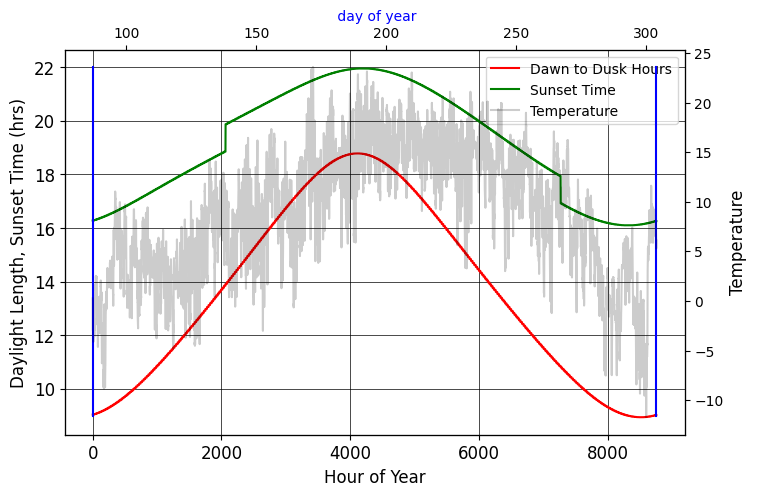

In [25]:
# plot daylight , sunset etc

fig = plt.figure(figsize=(8,5));
ax1 = fig.add_subplot(111)
it1 = ax1.plot(np.arange(len(hours)), hourlyDayLight, color='r',label='Dawn to Dusk Hours') 
it2 = ax1.plot(np.arange(len(hours)), hourlySunset, color='g',label='Sunset Time')

ax1.set_xlabel('Hour of Year', fontsize=12)
ax1.set_ylabel('Daylight Length, Sunset Time (hrs)', fontsize=12)
ax1.tick_params(axis='both', labelsize=12)
ax1.grid(color='k', linestyle='-', linewidth=0.5)


ax2 = ax1.twiny()  # instantiate a second x axes that shares the same y-axis
ax2.set_xlabel(' day of year', color='b')  # we already handled the y-label with ax1
#ax2.plot(np.arange(len(dates)), sunset, color='g')
ax2.plot(2*[dst_dates[0].dayofyear],[9,22],color='b')
ax2.plot(2*[dst_dates[1].dayofyear],[9,22],color='b')
ax2.tick_params(axis='y', labelcolor='b')

ax3 = ax1.twinx()
it3 = ax3.plot(np.arange(len(hours)), hourlyTemp, color='k',label='Temperature',alpha=0.2)
ax3.set_ylabel('Temperature', fontsize=12)


items = it1+it2+it3
labs = [i.get_label() for i in items]
ax1.legend(items, labs, loc=0);

Inputs for ANN            
a) Training and Prediction windows       
b) Hour of Day, Day Of Week etc Classifiers - Probably not needed ??          
c) styles and labels          
d) load and environmental data series           


** Train on 6 week periods and test on following 2 weeks    
 ie periods will start on same day of week   **      

*Must run following group of cells to set key parameters*

In [26]:
# set training and prediction window(s) :  maintain equal lengths for each period..

# preferred configuration: training on 6 periods across full year

nPeriods=6  
nWeeks=8   
trainWeeks=6  
predWeeks=2  

trainConfig = {'nPeriods':nPeriods,'nWeeks':nWeeks,'trainWeeks':trainWeeks,'predWeeks':predWeeks}

In [27]:
# set Classifiers: HourOfDay, DayOfWeek, Seasonality (PeriodOfYear)

#create HoD (Hour Of Day) classifier - see LCL3 script for analysis
nightTime = np.asarray([23,0,1,2,3,4,5,6])   # ie 2300 to 0700
earlyMorn = np.asarray([7,8,9])              # 0700 to 1000
dayTime = np.asarray([10,11,12,13,14,15])    # 1000 to 1600
eveningTime = np.asarray([16,17,18,19,20,21,22,23])   #1600 to 0000   OVERLAPS WITH nightTime
timeLists = [nightTime, earlyMorn, dayTime, eveningTime]   # list of lists

#create DayOfWeek classifier
dayClassifier = [[1,2,3,4],[5,6,0]]

# create PeriodOfYear classifier: h1 and h2 classes for 1st/2md half of year ; see LCL3 script
h1=np.arange(0,sum(daynum[0:6]))
h2=np.arange(sum(daynum[0:6]),sum(daynum[0:12]))


PoYlist=[h1,h2]   # period of year list
#PoYlist


In [28]:
# Set styles and label classes

lineStyles = ['-','-.',':','--']
lineStyles = ['solid', 'dashdot','dotted', 'dashed']
#https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/linestyles.html


lineColors = ['k','b','g','r','m','c']  
lineWidths = [2,2,4,3,3,3]
myStyles = {'lineStyles':lineStyles,'lineColors':lineColors,'lineWiths':lineWidths}

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', \
          'September', 'October','November', 'December']
daynum = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
dayLabels = ['Mon', 'Tue', 'Wed', 'Thu','Fri','Sat','Sun']
calVars = {'months':months,'daynum':daynum,'dayLabels':dayLabels}

for key in calVars.keys():
    print(key,'->',calVars[key])

#for val in calVars.values():
#   print(val)

months -> ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
daynum -> [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
dayLabels -> ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']


In [29]:
# PREPARE INPUTS 1:  - only need to do once for each trainConfig 

# Set windows and series lengths for each startTrain(i)+168 : end Pred(i))

featureLength,trainLength,predLength = 0,0,0
windows=np.zeros((nPeriods,4),dtype=np.int)  # to store train and predict windows

# loop through all periods, set training and prediction windows in each 
# NB : configured only for EQUAL length of each train+predict combined window 

for i in range(nPeriods):       # e.g. 6 periods of 8 weeks in year
    startTrain = np.int(i*(nWeeks*7)*24)        # start of each period
    endTrain = np.int( ((i*(nWeeks*7)+ (trainWeeks*7))*24))  # end of each training period
    startPred = endTrain
    endPred = np.int((i+1)*(nWeeks*7)*24)
    #print("startTrain:",startTrain,"endTrain:",endTrain,"startPred: ",startPred,"endPred: ",endPred)

    # train features start at startTrain+168 to capture aggLoad(t-168) data from TRAINING window only
    featureLength += (endPred-(startTrain+168))     # combined training+predict features
    trainLength += (endTrain-(startTrain+168))
    predLength += (endPred-startPred)     
 
    windows[i,0]= startTrain; windows[i,1]= endTrain
    windows[i,2]= startPred;  windows[i,3]= endPred
    
print("Totals: featureLength: ",featureLength,"trainLength: ",trainLength,"predLength: ",predLength)


Totals: featureLength:  7056 trainLength:  5040 predLength:  2016


In [30]:
print(windows)   # indices =  hour of year  
print(len(windows)) # number of periods.

[[   0 1008 1008 1344]
 [1344 2352 2352 2688]
 [2688 3696 3696 4032]
 [4032 5040 5040 5376]
 [5376 6384 6384 6720]
 [6720 7728 7728 8064]]
6


Prepare load, classifier and environmental series:

windows = list of start/stop hour of year indices defining each training / prediction window     

In [31]:
# colate environmental series for train and predict windows
envSeries = set_envSeries(windows,temp=hourlyTemp,dayLight=hourlyDayLight,sunset=hourlySunset)

for k,v in envSeries.items():
    print("env series:{0},length:{1},type:{2},first val:{3}".format(k,len(v),type(v),v[0]))


env series:tempTrain,length:5040,type:<class 'numpy.ndarray'>,first val:-7.55
env series:tempTest,length:2016,type:<class 'numpy.ndarray'>,first val:-1.17
env series:dayLightTrain,length:5040,type:<class 'numpy.ndarray'>,first val:9.204722222222221
env series:dayLightTest,length:2016,type:<class 'numpy.ndarray'>,first val:10.896111111111109
env series:sunsetTrain,length:5040,type:<class 'numpy.ndarray'>,first val:16.429444444444446
env series:sunsetTest,length:2016,type:<class 'numpy.ndarray'>,first val:17.493333333333336


In [32]:
# Use this IF wish to use MLR-style input numpy array for ANN training 
# 'ALL' arg => collate train+test in one section i.e. DON't SPLIT into train/test series.

#envSeries = set_envSeries(windows,'ALL',temp=hourlyTemp,dayLight=hourlyDayLight,sunset=hourlySunset)

#for k,v in envSeries.items():
#    print("env series:{0},length:{1},type:{2},first val:{3}".format(k,len(v),type(v),v[0]))


In [33]:
# get DayOfWeek classifier  

dowSeries = set_dowSeries(windows,aggLoad,dayClassifier)
dowSeries['dowTrain'].shape
dowSeries['dowTest'].shape

(2016, 2)

# Define load series to use 

In [34]:
# define and print inputs to set_loadSeries function . MUST have 'yData','yDataTrain','yDataTest'
loadSeriesList = ['yData',\
                  'yDataTrain','SN24train','SN25train','SN26train','SN168train',\
                  'yDataTest','SN24test','SN25test','SN26test','SN168test']        # set load series names 
# count number of train (and test) series:
numSeries=0
for series in loadSeriesList:
    if ('train' in series) or ('Train' in series):
        numSeries+=1
print("numSeries:",numSeries)

loadSeriesOffsetsWinStart = [168] + [168]*numSeries + [0]*numSeries  # set offsets from each window start (max time lag=168)
loadSeriesLags = [0]+[0,24,25,26,168]*2                              # set lag terms for each load series (t-lag)
loadSeriesWindows  = np.array([0,3]+[0,1]*numSeries+[2,3]*numSeries).reshape(-1,2)    # set windows for each series range


print("loadSeriesList: {0}".format(loadSeriesList))
print("loadSeriesOffsetsWinStart: {0}".format(loadSeriesOffsetsWinStart))    
print("loadSeriesLagsWinEnd: {0}".format(loadSeriesLags))
print("loadSeriesWindows: \nstart window indices:{0}, \nend window indices:{1}".format\
      (loadSeriesWindows[:,0],loadSeriesWindows[:,1]))


numSeries: 5
loadSeriesList: ['yData', 'yDataTrain', 'SN24train', 'SN25train', 'SN26train', 'SN168train', 'yDataTest', 'SN24test', 'SN25test', 'SN26test', 'SN168test']
loadSeriesOffsetsWinStart: [168, 168, 168, 168, 168, 168, 0, 0, 0, 0, 0]
loadSeriesLagsWinEnd: [0, 0, 24, 25, 26, 168, 0, 24, 25, 26, 168]
loadSeriesWindows: 
start window indices:[0 0 0 0 0 0 2 2 2 2 2], 
end window indices:[3 1 1 1 1 1 3 3 3 3 3]


Funtion *set_loadSeries* returns dictionary of modified load pd.Series      
load = input load series e.g. aggregate load    

In [35]:
# colate load series for train and predict windows

loadSeries = set_loadSeries(windows,aggLoad,loadSeriesList,loadSeriesOffsetsWinStart,loadSeriesLags,\
                   loadSeriesWindows,'print_output')  # return dictionary of all load series 

for k,v in loadSeries.items():
    print("{0} of length {1},{2}".format(k,len(v),type(v)))

series: yData: append input load for windows(0,0)+168-0:windows(0,3)-0
series: yDataTrain: append input load for windows(0,0)+168-0:windows(0,1)-0
series: SN24train: append input load for windows(0,0)+168-24:windows(0,1)-24
series: SN25train: append input load for windows(0,0)+168-25:windows(0,1)-25
series: SN26train: append input load for windows(0,0)+168-26:windows(0,1)-26
series: SN168train: append input load for windows(0,0)+168-168:windows(0,1)-168
series: yDataTest: append input load for windows(0,2)+0-0:windows(0,3)-0
series: SN24test: append input load for windows(0,2)+0-24:windows(0,3)-24
series: SN25test: append input load for windows(0,2)+0-25:windows(0,3)-25
series: SN26test: append input load for windows(0,2)+0-26:windows(0,3)-26
series: SN168test: append input load for windows(0,2)+0-168:windows(0,3)-168
yData of length 7056,<class 'pandas.core.series.Series'>
yDataTrain of length 5040,<class 'pandas.core.series.Series'>
SN24train of length 5040,<class 'pandas.core.series

In [36]:
# check loadSeries values make sense eg. compare lagged values 

for k,v in loadSeries.items():
    if k == 'yData':
        print("{0},{1}\n,{2} \n".format(k,v.head(1),v.tail(1)))
    if k == 'yDataTrain':
        print("{0},{1}\n,{2} \n".format(k,v.head(1),v.tail(1)))
    if k == 'SN24train':
        print("{0},{1}\n,{2} \n".format(k,v.head(1),v.tail(1)))
    if k == 'yDataTest':
        print("{0},{1}\n,{2} \n".format(k,v.head(1),v.tail(1)))
    if k == 'SN24test':
        print("{0},{1}\n,{2} \n".format(k,v.head(1),v.tail(1)))


yData,2010-01-08    377.1495
dtype: float64
,2010-12-02 23:00:00    463.9065
dtype: float64 

yDataTrain,2010-01-08    377.1495
dtype: float64
,2010-11-18 23:00:00    406.017
dtype: float64 

SN24train,2010-01-07    379.7755
dtype: float64
,2010-11-17 23:00:00    415.26
dtype: float64 

yDataTest,2010-02-12    317.3305
dtype: float64
,2010-12-02 23:00:00    463.9065
dtype: float64 

SN24test,2010-02-11    291.4665
dtype: float64
,2010-12-01 23:00:00    474.268
dtype: float64 



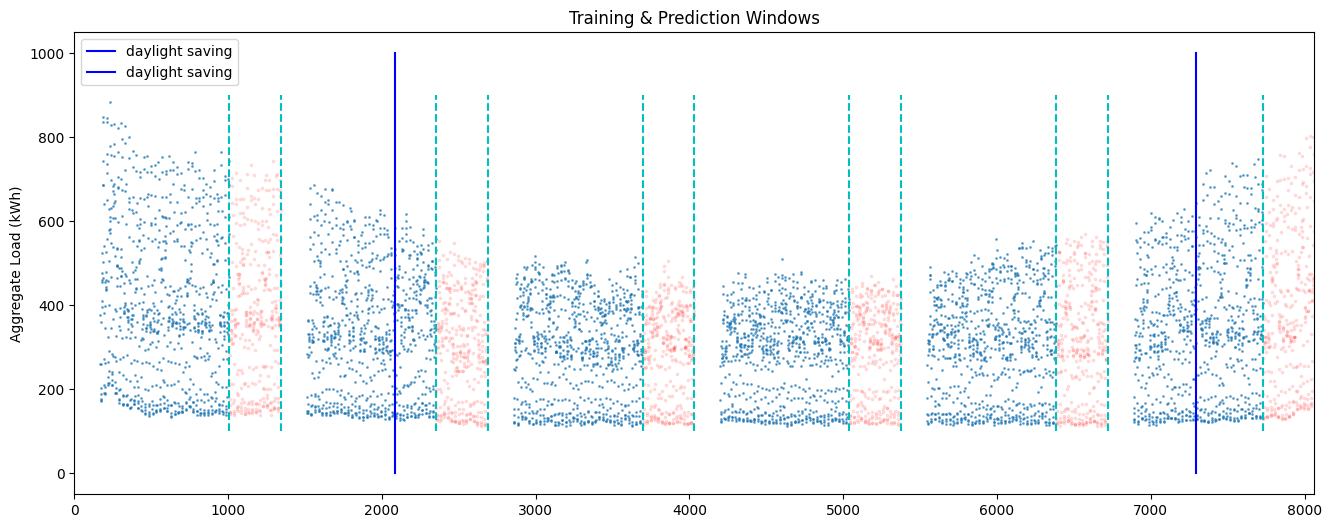

Hour of Year range: 168 8064


In [37]:
# Plot TRAINING and PREDICTION windows with semi-transparent scatter plot of load data

# construct constant series to show ranges of training and prediction windows
df = pd.DataFrame(index=(loadSeries['yDataTrain'].index).union(loadSeries['yDataTest'].index)) 
df['hourOfYear']=((df.index.dayofyear-1)*24)+df.index.hour
df1 = df.loc[loadSeries['yDataTrain'].index, :] 
df1['flg']=1
df1['hourOfYear']=((df1.index.dayofyear-1)*24)+df1.index.hour

df2 = df.loc[loadSeries['yDataTest'].index, :] 
df2['flg']=2
df2['hourOfYear']=((df2.index.dayofyear-1)*24)+df2.index.hour
df = pd.concat([df1,df2])

# plot a) data b)  window ranges
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(111)

if len(windows)<=1:
    ax1.plot(df1['hourOfYear'],loadSeries['yDataTrain'].values,alpha=0.6)    
    ax1.plot(df2['hourOfYear'],loadSeries['yDataTest'].values,alpha=0.1,color='r') 
else:
    ax1.scatter(df1['hourOfYear'],loadSeries['yDataTrain'].values,s=1,alpha=0.6)
    ax1.scatter(df2['hourOfYear'],loadSeries['yDataTest'].values,alpha=0.1,s=3,color='r')


# add train and predict windows
yLim = get_limits(loadSeries['yData'], decimals=-2)     
for w,win in enumerate(windows):
    ax1.plot(2*[win[0]],[yLim[0],yLim[1]],color='c',linestyle='--')
    ax1.plot(2*[win[1]],[yLim[0],yLim[1]],color='c',linestyle='--')    
    
#add Daylight saving start/end dates
for d,date in enumerate(dst_dates):
    ax1.plot(2*[24*(date.dayofyear)],[0,1000],color='b',label='daylight saving')
    #ax1.plot(2*[24*(date.dayofyear)],[0,1000],color='y',label=legLabels[d])

ax1.set_ylabel('Aggregate Load (kWh)')  
ax1.set_title('Training & Prediction Windows')


ax1.set_xlim(0,df['hourOfYear'].max()+1)
ax1.legend()
plt.show()
del df1,df2

print("Hour of Year range:",df['hourOfYear'].min(),df['hourOfYear'].max()+1)
            
            

    
Note 1-week gap in train data at start each period        


**Training & Prediction Data Setup**

In [38]:
# check data values : envSeries, dowSeries
for k,v in envSeries.items():
    print(k,len(v),v[0:5])
for k,v in dowSeries.items():
    print(k,len(v),v[0:5,:])

tempTrain 5040 [-7.55 -8.7  -8.47 -7.89 -6.88]
tempTest 2016 [-1.17  0.28  0.35  1.11  0.56]
dayLightTrain 5040 [9.20472222 9.20472222 9.20472222 9.20472222 9.20472222]
dayLightTest 2016 [10.89611111 10.89611111 10.89611111 10.89611111 10.89611111]
sunsetTrain 5040 [16.42944444 16.42944444 16.42944444 16.42944444 16.42944444]
sunsetTest 2016 [17.49333333 17.49333333 17.49333333 17.49333333 17.49333333]
dowTrain 5040 [[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]
dowTest 2016 [[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


# Note: 
 Next section runs ANN forecasting for total AGGREGATE load (all users). If wish to run ANN for smaller aggregation levels, jump to : 
        "# ANN for all aggregation levels - Run on COLAB". Requisite inputs for later are already defined above.

# split training and test data : 

 NOTE - After testing on aggregate forecast, concluded that both V1 and V2 give v similar results
 Hence, since V1 is simpler and has less input features, go with this .
 (V2: creates 2 of each load training series for weekdays, weekends respectively - scaled by dow classifier).     

In [ ]:
# get keys (series names) from load and env series for train, test datasets 

loadSeriesTrain,loadSeriesTest = getTrainTestSeriesNames(loadSeries)
envSeriesTrain,envSeriesTest  = getTrainTestSeriesNames(envSeries)
print("loadSeriesTrain: ",loadSeriesTrain)
print("loadSeriesTest: ",loadSeriesTest)
print("envSeriesTrain: ",envSeriesTrain)
print("envSeriesTest: ",envSeriesTest)

loadSeriesTrain:  ['yDataTrain', 'SN24train', 'SN25train', 'SN26train', 'SN168train']
loadSeriesTest:  ['yDataTest', 'SN24test', 'SN25test', 'SN26test', 'SN168test']
envSeriesTrain:  ['tempTrain', 'dayLightTrain', 'sunsetTrain']
envSeriesTest:  ['tempTest', 'dayLightTest', 'sunsetTest']


In [ ]:
#### IF WANT TO USE V1 **
df_Train = create_TrainPredict_df(loadSeriesTrain,loadSeries,envSeriesTrain,envSeries,\
                                  ['dowTrain'],dowSeries)

df_Test = create_TrainPredict_df(loadSeriesTest,loadSeries,envSeriesTest,envSeries,\
                                    ['dowTest'],dowSeries)

In [ ]:
# verify shapes and columns correct ..

print(df_Train.shape)
print(df_Test.shape)
#print(df_Train.head(2),"\n\n",df_Train.tail(2),"\n")
#print(df_Test.head(2),"\n\n",df_Test.tail(2))

(5040, 10)
(2016, 10)


In [ ]:
df_Train

,yDataTrain,SN24train,SN25train,SN26train,SN168train,tempTrain,dayLightTrain,sunsetTrain,dow1,dow2
0,377.1495,379.7755,556.1845,660.5565,414.6385,-7.55,9.204722,16.429444,1.0,0.0
1,259.5030,256.5365,379.7755,556.1845,285.0400,-8.70,9.204722,16.429444,1.0,0.0
2,203.7050,212.4905,256.5365,379.7755,216.4800,-8.47,9.204722,16.429444,1.0,0.0
3,174.1250,176.8945,212.4905,256.5365,185.0830,-7.89,9.204722,16.429444,1.0,0.0
4,172.9350,167.6700,176.8945,212.4905,172.1670,-6.88,9.204722,16.429444,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
5035,675.1755,687.8310,747.3260,629.2895,661.1580,7.26,9.811944,16.406389,1.0,0.0
5036,621.7830,623.9275,687.8310,747.3260,614.3875,7.28,9.811944,16.406389,1.0,0.0
5037,593.8080,598.3870,623.9275,687.8310,578.3590,6.50,9.811944,16.406389,1.0,0.0
5038,490.7925,531.6695,598.3870,623.9275,493.7385,6.37,9.811944,16.406389,1.0,0.0


In [ ]:
df_Test   #.loc[df_Predict.iloc[:,1].isna()]

,yDataTest,SN24test,SN25test,SN26test,SN168test,tempTest,dayLightTest,sunsetTest,dow1,dow2
0,317.3305,291.4665,438.9220,548.3850,280.0195,-1.17,10.896111,17.493333,1.0,0.0
1,213.3490,206.4465,291.4665,438.9220,188.1205,0.28,10.896111,17.493333,1.0,0.0
2,161.6175,160.7050,206.4465,291.4665,149.9965,0.35,10.896111,17.493333,1.0,0.0
3,146.9725,151.8550,160.7050,206.4465,142.8570,1.11,10.896111,17.493333,1.0,0.0
4,142.2020,138.7420,151.8550,160.7050,137.8895,0.56,10.896111,17.493333,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2011,759.2895,776.9535,802.6630,727.2210,673.4700,-2.02,9.254167,16.164167,1.0,0.0
2012,695.5860,711.3810,776.9535,802.6630,638.7200,-2.63,9.254167,16.164167,1.0,0.0
2013,648.7570,657.4055,711.3810,776.9535,585.8675,-4.42,9.254167,16.164167,1.0,0.0
2014,576.1125,588.7700,657.4055,711.3810,522.8600,-4.69,9.254167,16.164167,1.0,0.0


# decide which columns (features) to keep for ANN training 
convert inputs and targets to numpy arrays for MLP 


In [ ]:
# get list of all train and test series (load, env,dow) from dataframes;excludes yData (1st load col)
trainSeries,testSeries = get_TrainTestSeries(df_Train,df_Test)
trainSeries
#testSeries

['SN24train',
 'SN25train',
 'SN26train',
 'SN168train',
 'tempTrain',
 'dayLightTrain',
 'sunsetTrain',
 'dow1',
 'dow2']

In [ ]:
# drop some more series 

# for now, using dayLight hrs rather than sunset time..

#for series in ["tempTrain","dayLightTrain","sunsetTrain"]: # remove all env vars
#for series in ["dayLightTrain","sunsetTrain"]:             # run8
#for series in ['SN25traindow1', 'SN25traindow2', 'SN26traindow1', 'SN26traindow2',"dayLightTrain","sunsetTrain"]:
for series in ["sunsetTrain"]:     
    trainSeries.remove(series)
    
#for series in ["tempTest","dayLightTest","sunsetTest"]:
#for series in ["dayLightTest","sunsetTest"]:
#for series in [ 'SN25dow1', 'SN25dow2', 'SN26dow1', 'SN26dow2',"dayLightTest","sunsetTest"]:
for series in ["sunsetTest"]:
    testSeries.remove(series)

In [ ]:
# get training and test inputs as np array
aggTrainingData  = df_Train[trainSeries].values 
aggTestingData = df_Test[testSeries].values   

# set target load np arrays for ANN training and testing  (identical to that in LCL7 MLR code)
aggLoadTrain =  df_Train[['yDataTrain']].values
aggLoadTest =  df_Test[['yDataTest']].values

In [ ]:
aggTrainingData.shape

(5040, 8)

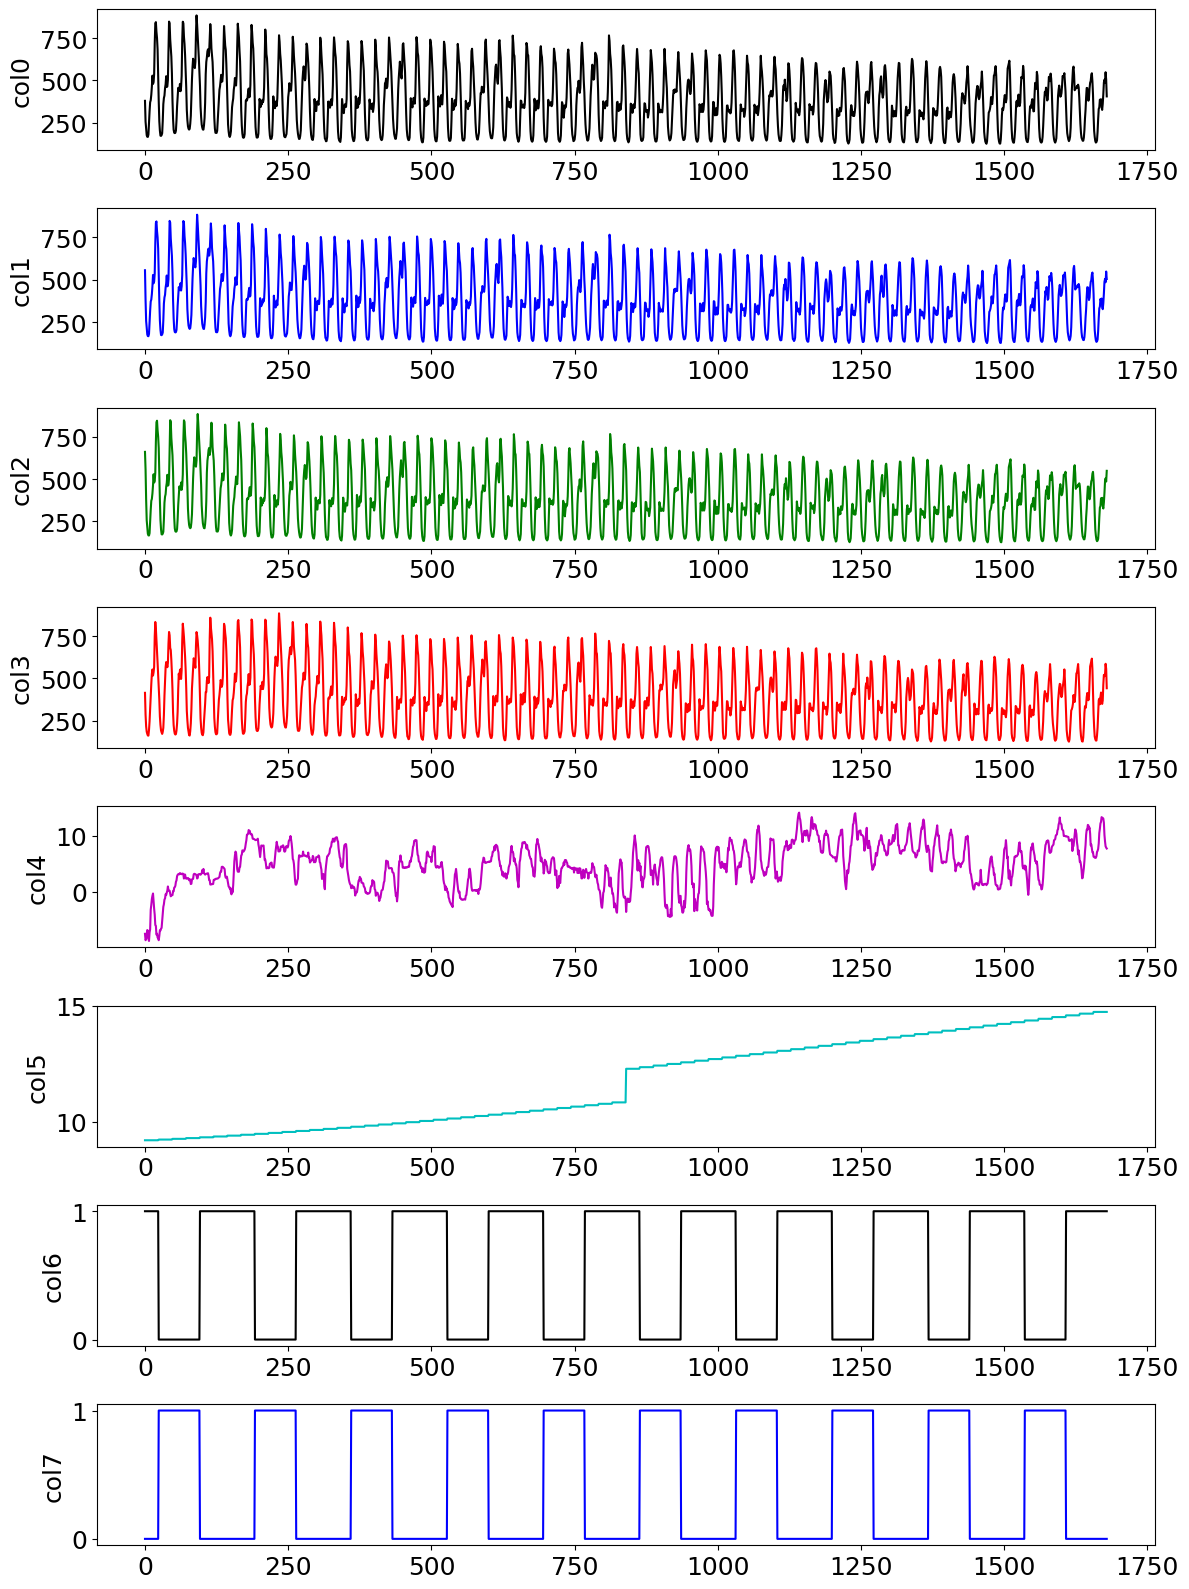

In [ ]:
# plot all input features
plot_allFeatures(0,aggTrainingData.shape[1],aggTrainingData,windowLength=10*168)

In [ ]:
# save the training /testing data 
with open('./project_data/intermediateDataIreland/aggTrainingData_ANN.pickle', 'wb') as f:
    pickle.dump(aggTrainingData, f, protocol=pickle.HIGHEST_PROTOCOL)
with open('./project_data/intermediateDataIreland/aggTestingData_ANN.pickle', 'wb') as f:
    pickle.dump(aggTestingData, f, protocol=pickle.HIGHEST_PROTOCOL)
    

# run ANN for aggregate case 

normally skip next couple cells - use ONLY IF WANT TO USE EXACT MLR INPUTS IE WITH LINEAR AND QUADRATIC TERMS as inputs to ANN


In [ ]:
# revisit input to MLR (18 features)  

#with open('./project_data/intermediateDataIreland/aggTrainingData.pickle', 'rb') as pickleFile:
#    aggTrainingData = pickle.load(pickleFile, encoding='latin-1') 
#with open('./project_data/intermediateDataIreland/aggTestingData.pickle', 'rb') as pickleFile:
#    aggTestingData = pickle.load(pickleFile, encoding='latin-1') 
#with open('./project_data/intermediateDataIreland/aggTrainingDataUnaware.pickle', 'rb') as pickleFile:
#    aggTrainingDataUnaware = pickle.load(pickleFile, encoding='latin-1') 
#with open('./project_data/intermediateDataIreland/aggTestingDataUnaware.pickle', 'rb') as pickleFile:
#    aggTestingDataUnaware = pickle.load(pickleFile, encoding='latin-1') 
    

In [ ]:
# uncomment next lines if want to EXclude Temperature terms (for MLR allFeatures input)
#aggTrainingData = aggTrainingDataUnaware
#aggTestingData = aggTestingDataUnaware
#aggTrainingData
#print(aggTrainingData.shape)

# Normalisation of Inputs  & Targets

https://machinelearningmastery.com/how-to-improve-neural-network-stability-and-modeling-performance-with-data-scaling/

Had a lot of problems trying to get this working but eventually got there: above website v useful . Required    
a) normalization of inputs and outputs with scikit learn MinMaxScaler
b) apply inverse_transform to ANN output BEFORE computing errors 


In [ ]:
aggTrainingData.shape
aggLoadTrain.shape

(5040, 1)

In [ ]:
# apply scaling 

MinMax_SC_trainingData = MinMaxScaler()
MinMax_SC_testingData = MinMaxScaler()
MinMax_SC_trainingLoad = MinMaxScaler()
MinMax_SC_testingLoad = MinMaxScaler()

aggTrainingDataNormalized = MinMax_SC_trainingData.fit_transform(aggTrainingData)
aggTestingDataNormalized = MinMax_SC_testingData.fit_transform(aggTestingData)
aggLoadTrainNormalized = MinMax_SC_trainingLoad.fit_transform(aggLoadTrain.reshape(-1,1))
aggLoadTestNormalized = MinMax_SC_testingLoad.fit_transform(aggLoadTest.reshape(-1,1))

scalers={'sc1':MinMax_SC_trainingData,'sc2':MinMax_SC_testingData,'sc3':MinMax_SC_trainingLoad,'sc4':MinMax_SC_testingLoad}

5040


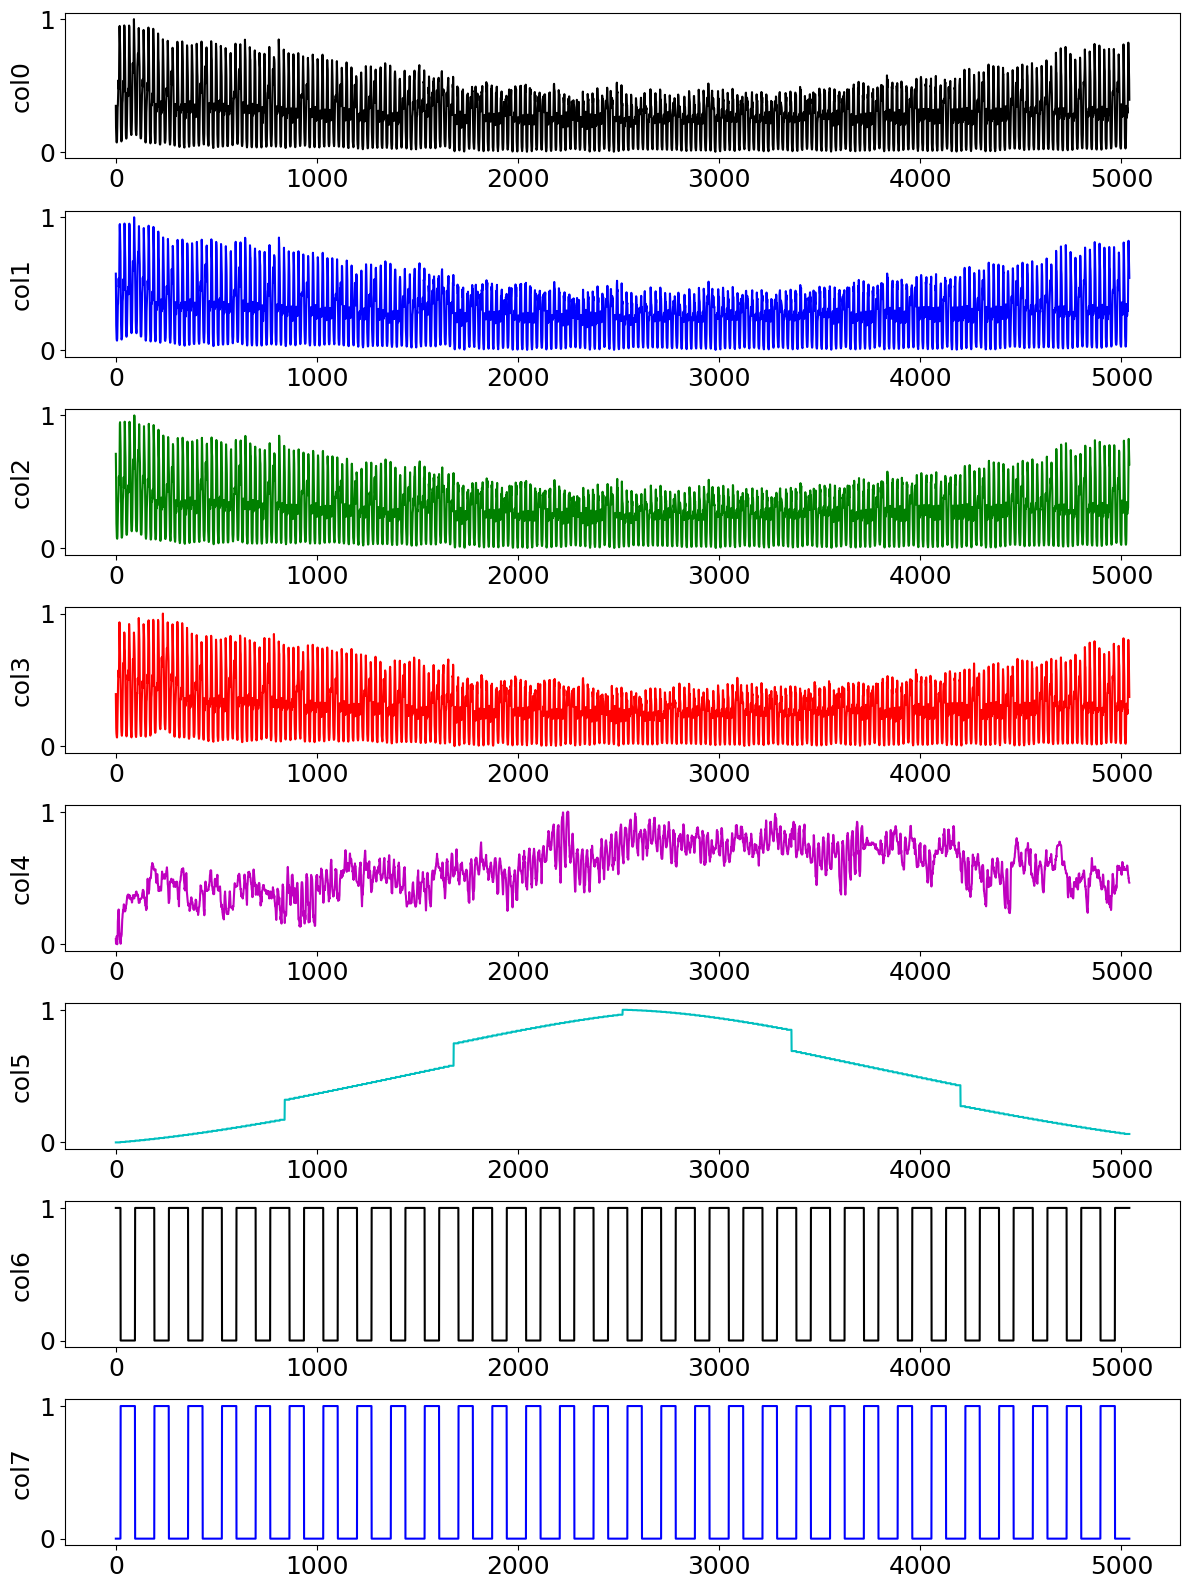

In [ ]:
# plot all input features
plot_allFeatures(0,aggTrainingDataNormalized.shape[1],aggTrainingDataNormalized)

In [ ]:
# check scaler values
for scName,scaler in scalers.items():
    print(scaler.scale_)

[0.00129653 0.00129653 0.00129653 0.00129452 0.0308642  0.10461771
 1.         1.        ]
[0.00144897 0.00144897 0.00144897 0.00153102 0.03477051 0.10515554
 1.         1.        ]
[0.00129653]
[0.00144897]


In [ ]:
#test inverse scaling - should give array of 0's
#aggTrainingData_inversed=scalers['sc1'].inverse_transform(aggTrainingDataNormalized)
#aggTrainingData_inversed-aggTrainingData

In [ ]:
#check min/max of input (pre-normalization)
print("Training Inputs: \nmin {0}  \nmax {1}\n".format(get_NPminmax_values(aggTrainingData,ax=0)[0],get_NPminmax_values(aggTrainingData,ax=0)[1]))
print("Testing Inputs: \nmin {0}  \nmax {1}\n".format(get_NPminmax_values(aggTestingData,ax=0)[0],get_NPminmax_values(aggTestingData,ax=0)[1]))
print("Training Target (load): min {0}  max {1}\n".format(get_NPminmax_values(aggLoadTrain,ax=0)[0],get_NPminmax_values(aggLoadTrain,ax=0)[1]))
print("Testing Target (load): min {0}  max {1}\n".format(get_NPminmax_values(aggLoadTest,ax=0)[0],get_NPminmax_values(aggLoadTest,ax=0)[1]))

Training Inputs: 
min [112.7055     112.7055     112.7055     111.5055      -8.83
   9.20472222   0.           0.        ]  
max [883.994      883.994      883.994      883.994       23.57
  18.76333333   1.           1.        ]

Testing Inputs: 
min [112.5175     112.5175     112.5175     112.8485      -7.52
   9.25416667   0.           0.        ]  
max [802.663      802.663      802.663      766.0085      21.24
  18.76388889   1.           1.        ]

Training Target (load): min [112.7055]  max [883.994]

Testing Target (load): min [112.5175]  max [802.663]



In [ ]:
# get number of columns in input features array
nCols = aggTrainingData.shape[1]
nCols = aggTrainingDataNormalized.shape[1]
nCols

8

In [ ]:
# check normalized min/max
print("Training Inputs Normalized: \nmin {0}  \nmax {1}\n".format(get_NPminmax_values(aggTrainingDataNormalized,ax=0)[0],get_NPminmax_values(aggTrainingDataNormalized,ax=0)[1]))
print("Testing Inputs Normalized: \nmin {0}  \nmax {1}\n".format(get_NPminmax_values(aggTestingDataNormalized,ax=0)[0],get_NPminmax_values(aggTestingDataNormalized,ax=0)[1]))
print("Training Target (load) Normalized: min {0}  max {1}\n".format(get_NPminmax_values(aggLoadTrainNormalized,ax=0)[0],get_NPminmax_values(aggLoadTrainNormalized,ax=0)[1]))
print("Testing Target (load) Normalized: min {0}  max {1}\n".format(get_NPminmax_values(aggLoadTestNormalized,ax=0)[0],get_NPminmax_values(aggLoadTestNormalized,ax=0)[1]))

Training Inputs Normalized: 
min [0. 0. 0. 0. 0. 0. 0. 0.]  
max [1. 1. 1. 1. 1. 1. 1. 1.]

Testing Inputs Normalized: 
min [0. 0. 0. 0. 0. 0. 0. 0.]  
max [1. 1. 1. 1. 1. 1. 1. 1.]

Training Target (load) Normalized: min [0.]  max [1.]

Testing Target (load) Normalized: min [0.]  max [1.]



# now run ANN for aggregate case all together in one go

In [ ]:
# select whether to use normalised or original inputs,targets

use_Normalization=True
#use_Normalization=False


# check inputs/outputs for ANN training 


In [ ]:
print("Training data shape{0}, load (target) data shape {1}".format(aggTrainingDataNormalized.shape,aggLoadTrainNormalized.shape))
print("Test data shape{0}, load (target) data shape {1}".format(aggTestingDataNormalized.shape,aggLoadTestNormalized.shape))

Training data shape(5040, 8), load (target) data shape (5040, 1)
Test data shape(2016, 8), load (target) data shape (2016, 1)


5040
5040
2016


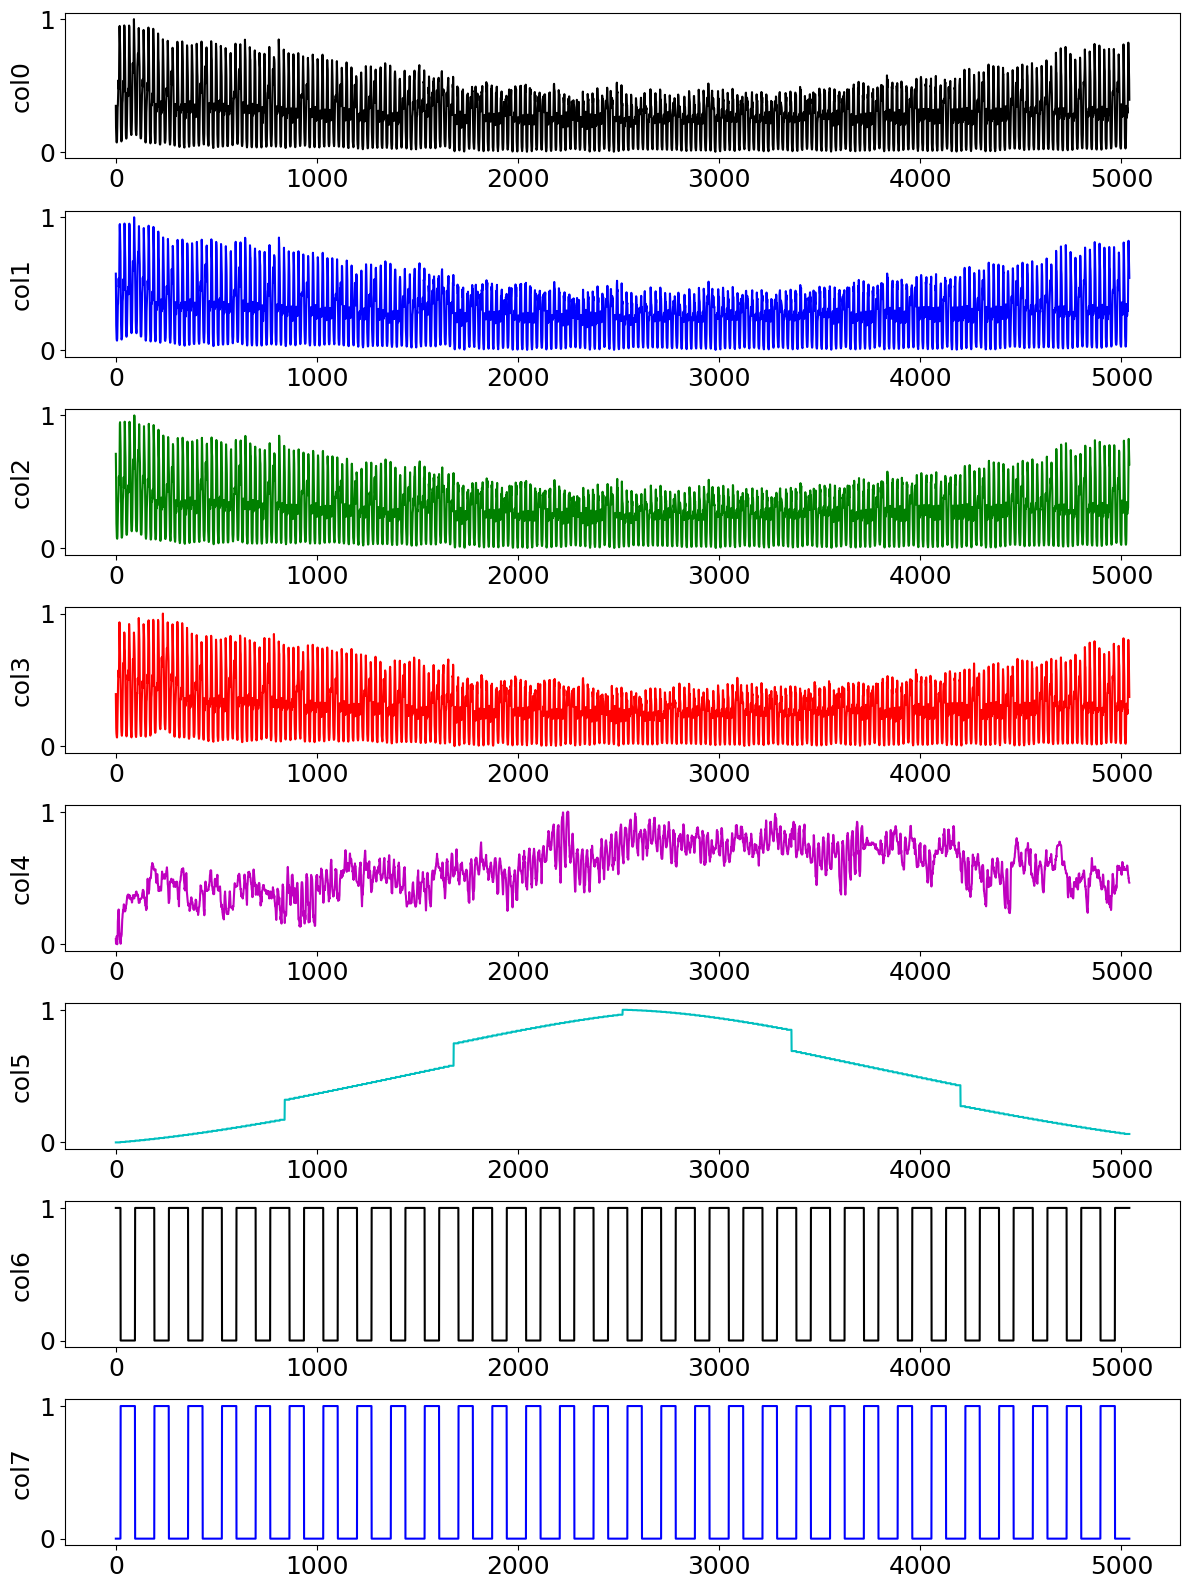

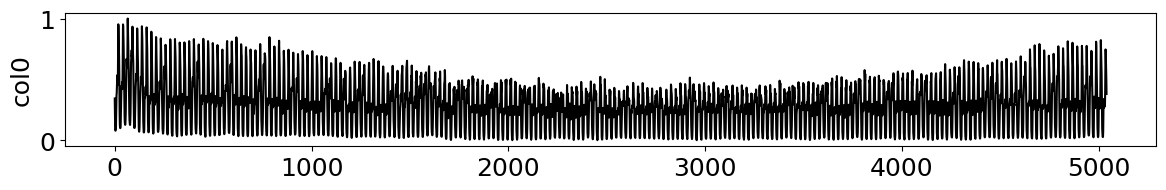

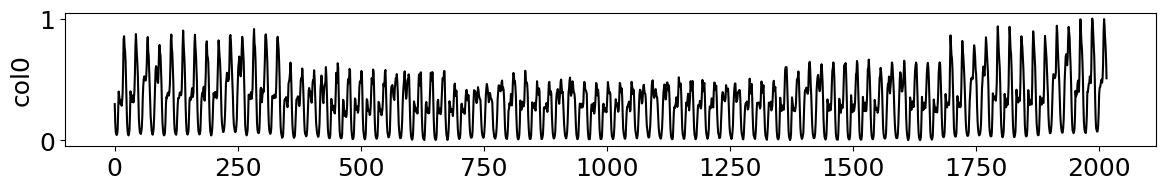

In [ ]:
if use_Normalization == True:
    plot_allFeatures(0,aggTrainingDataNormalized.shape[1],aggTrainingDataNormalized)
    plot_allFeatures(0,1,aggLoadTrainNormalized)
    plot_allFeatures(0,1,aggLoadTestNormalized)    
else:
    plot_allFeatures(0,aggTrainingData.shape[1],aggTrainingData)
    plot_allFeatures(0,1,aggLoadTrain)
    plot_allFeatures(0,1,aggLoadTest)
    
    

In [ ]:
# set appropriate train/target arrays
if use_Normalization == True:
    trainData=aggTrainingDataNormalized
    testData=aggTestingDataNormalized
    trainTarget=aggLoadTrainNormalized
    testTarget=aggLoadTestNormalized
else:
    trainData=aggTrainingData
    testData=aggTestingData
    trainTarget=aggLoadTrain
    testTarget=aggLoadTest
 

In [ ]:
# check as expected : input and target examples
print(trainData[0])
trainTarget[:10]

[0.34626472 0.57498459 0.7103062  0.39241102 0.03950617 0.
 1.         0.        ]


array([[0.34286003],
       [0.19032761],
       [0.11798374],
       [0.07963233],
       [0.07808946],
       [0.08415852],
       [0.09872311],
       [0.19162804],
       [0.3208916 ],
       [0.36725687]])

Now run ANN model (AGGREGATE) forecast

Model: "MLP model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 20)                180       
_________________________________________________________________
layer2 (Dense)               (None, 20)                420       
_________________________________________________________________
layer3 (Dense)               (None, 1)                 21        
Total params: 621
Trainable params: 621
Non-trainable params: 0
_________________________________________________________________
model metrics names:  ['loss', 'mean_squared_error']
history content keys:  dict_keys(['val_loss', 'val_mean_squared_error', 'loss', 'mean_squared_error'])
-- 15.370207071304321 seconds to run ANN fit, current time21:51:49
2016/2016 [==============================] - 0s 17us/step
Train Score: 0.0013 MSE (0.04 RMSE)
Test Score: 0.0017 MSE (0.04 RMSE)
......Training window errors: Mapes: 

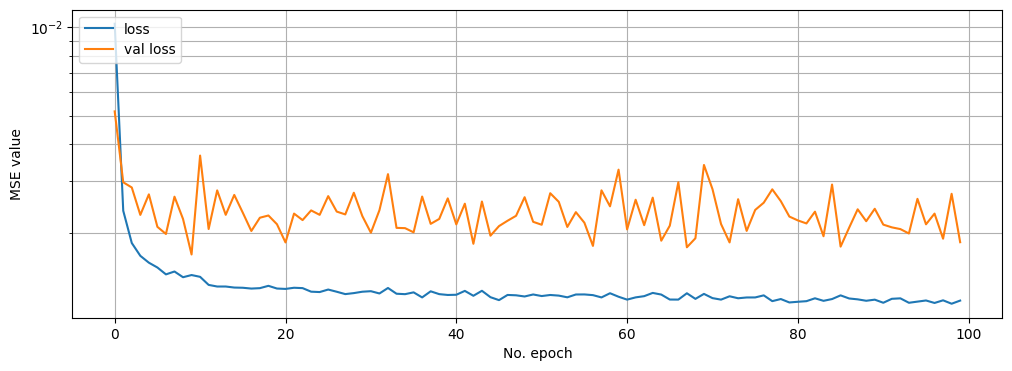

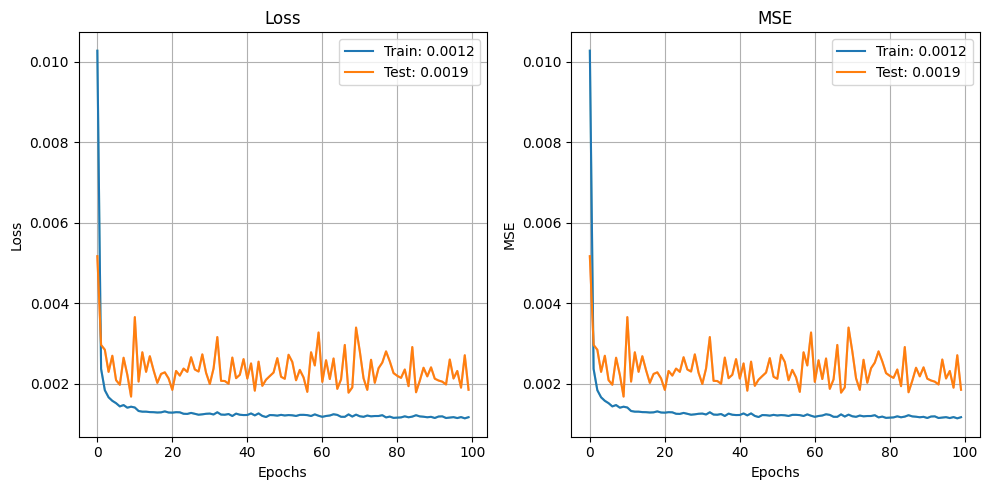

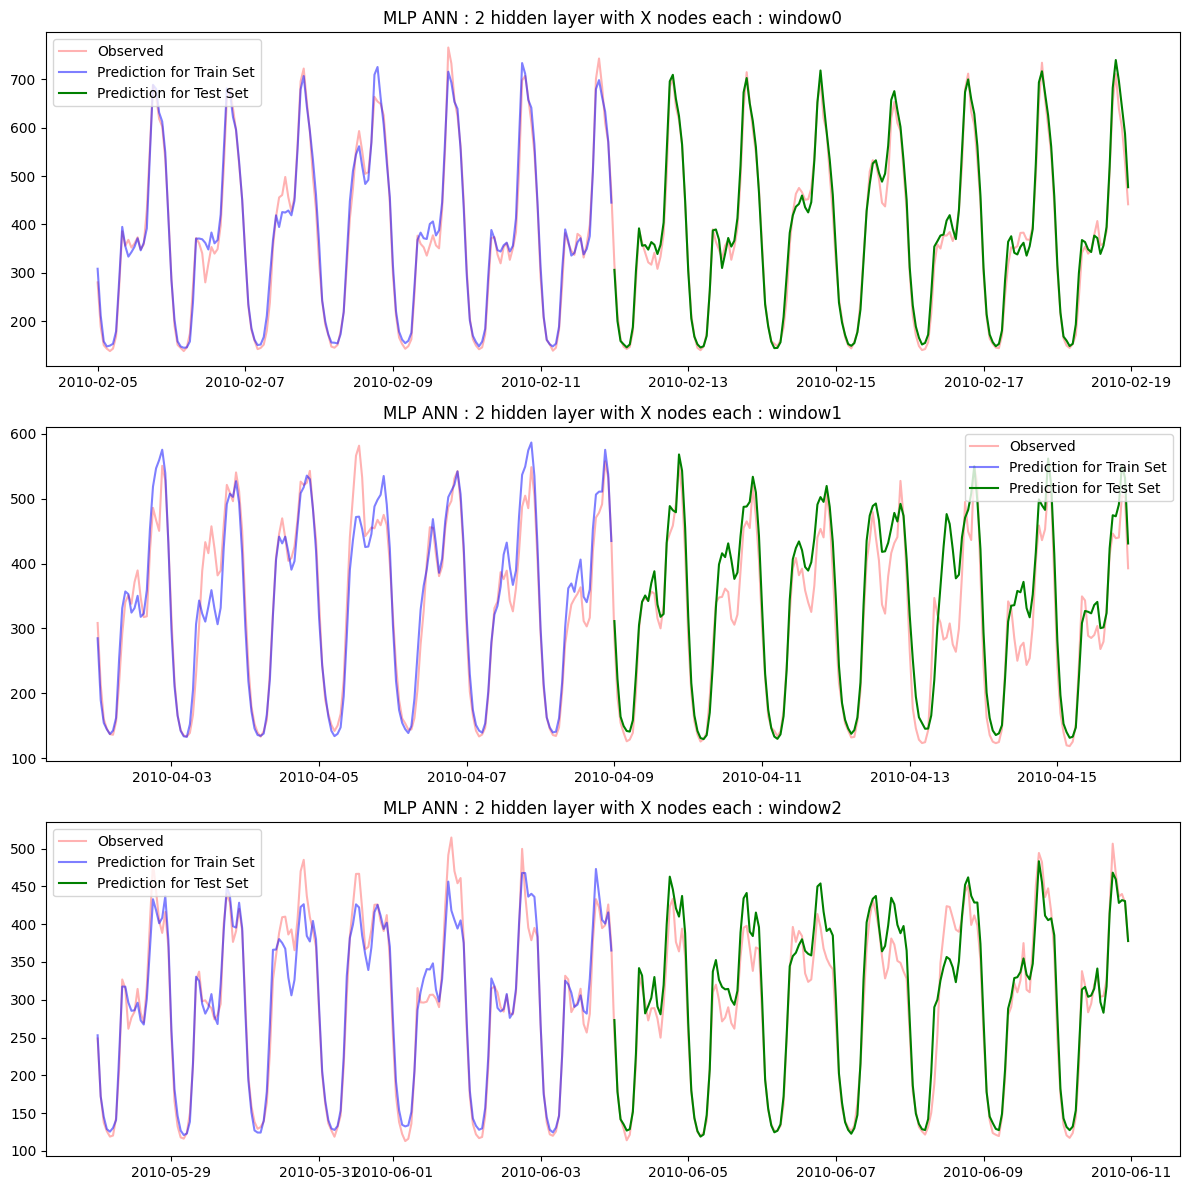

In [ ]:
# run ANN for total AGGREGATE load forecast :

# CHECK THESE PARAMETERS ARE AS REQUIRED  
# set ANN parameters
numHL=2
nNodes = 20  # nodes for hidden ANN layers
nEpochs = 100 # number of training cycles in fitting
batchSize = 32  # number batches in fitting
val_split=0.2

lossFunction = 'mean_squared_error'
optimizer = 'adam'                   # adam = gradient descent type optimizer; 
#optimizer = keras.optimizers.Adam(learning_rate=0.001)    # default learning rate is 0.001: if wish to change
metrics = ['mean_squared_error']     # Note: can't use 'accuracy' metric since bot a classifcation problem




start_time = time.time()
#create MLP model: trainDataSeries,nodesPerHiddenLayer,numInputFeatures
mdl = create_MLP(trainData,nNodes,trainData.shape[1],numHL=numHL,activation='relu')          

# specify loss function AND optimizer (search technique used to update weights)
# options for loss function: MSE,MAE,Huber loss, MAPE,RMSE,Logcosh : see https://www.machinecurve.com/index.php/2019/10/04/about-loss-and-loss-functions/#loss-functions-for-regression
mdl.compile(loss=lossFunction, optimizer=optimizer,metrics=metrics)    # adam = gradient descent type optimizer, NOTE 'accuracy' metric only applicable for classification problems

#view model
mdl.layers                                                                # list model layers
mdl.summary()                                                             # display model contents
print("model metrics names: ",mdl.metrics_names)

#fit model - optional - may use callbacks to stop training when reach specified threshold of loss function.. 
callbacks = [keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=1e-3,
        # "no longer improving" being further defined as "for at least 5 epochs"
        patience=5, verbose=1,
    )]

history = mdl.fit(trainData, trainTarget, epochs=nEpochs, batch_size=batchSize, verbose=0,\
                 validation_split=val_split)    #,callbacks = callbacks  )
historyPlot(history)

# alternative way to plot history object 
from plot_keras_history import plot_history
print("history content keys: ",history.history.keys())
plot_history(history.history)

print("-- {0} seconds to run ANN fit, current time{1}".format((time.time()-start_time),datetime.now().strftime("%H:%M:%S")) )

# see https://stackoverflow.com/questions/44476706/what-is-the-difference-between-keras-model-evaluate-and-model-predict

# estimate model performance 
train_score = mdl.evaluate(trainData, trainTarget, verbose=1)     
test_score = mdl.evaluate(testData, testTarget, verbose=1)
#print('Train Score: {:.4f} MSE ({:.2f} RMSE)'.format(train_score, math.sqrt(train_score)))
#print('Test Score: {:.4f} MSE ({:.2f} RMSE)'.format(test_score, math.sqrt(test_score)))
print('Train Score: {:.4f} MSE ({:.2f} RMSE)'.format(train_score[0], math.sqrt(train_score[0])))
print('Test Score: {:.4f} MSE ({:.2f} RMSE)'.format(test_score[0], math.sqrt(test_score[0])))

# generate predictions 
train_predict = mdl.predict(trainData)
test_predict = mdl.predict(testData)
test_predict=np.squeeze(test_predict)                                   # remove redundant dimensions from array shape
train_predict=np.squeeze(train_predict)
annForecast={'trainPredict':train_predict,'testPredict':test_predict}   # create dictionary of forecast series

#now need to rescale forecast if used normalisation of inputs,target etc
if use_Normalization == True:
    annForecast['trainPredict']=scalers['sc3'].inverse_transform(annForecast['trainPredict'].reshape(-1,1))
    annForecast['testPredict']=scalers['sc4'].inverse_transform(annForecast['testPredict'].reshape(-1,1))   
    
# calculate forecast errors for TRAIN periods
modelsANN = {'ANN_MPL': annForecast['trainPredict']}  ## create dictionary of model names for forecast period

# error checking (had to update get_errors to handle MinMaxScaler 2D array )
#for k,v in modelsANN.items():
#    print("key {0} \n value {1}\n value type {2}, val shape {3}, ydata shape {4}".format(k,v,type(v),v.shape,loadSeries['yDataTrain'].values.shape))

errorsANNtrain = get_errors(loadSeries['yDataTrain'],modelsANN)
print("......Training window errors: Mapes: {0}, MCVs: {1}, MNRMSEs: {2} \n".format\
              (errorsANNtrain['MAPEs'],errorsANNtrain['MCVs'],errorsANNtrain['MNRMSEs']))

# put TRAIN errors in df with nrows = nModels (1 for now); nCols = nErrorTypes
df_errorsANNtrain = pd.DataFrame.from_dict(errorsANNtrain)
df_errorsANNtrain['models']=list(modelsANN.keys())
df_errorsANNtrain = df_errorsANNtrain.set_index('models')

# calculate forecast errors for TEST periods
modelsANN = {'ANN_MPL': annForecast['testPredict']}  ## create dictionary of model names for forecast period
errorsANN = get_errors(loadSeries['yDataTest'],modelsANN)
print("......Test window errors: Mapes: {0}, MCVs: {1}, MNRMSEs: {2}".format(errorsANN['MAPEs'],errorsANN['MCVs'],errorsANN['MNRMSEs']))

# put TEST errors in df with nrows = nModels (1 for now); nCols = nErrorTypes
df_errorsANN = pd.DataFrame.from_dict(errorsANN)
df_errorsANN['models']=list(modelsANN.keys())
df_errorsANN = df_errorsANN.set_index('models')

#  shift train predictions to align with hr/day indices ie unpack into actual time bands (for easy PLOTTING)
annForecastPlotSeries = annPlotInputs(aggLoad,windows,annForecast)

# plot forecast for 1 week each side of train/test window edge
#annPlot(aggLoad,annForecastPlotSeries,windows)                # plot for all periods 
annPlot(aggLoad,annForecastPlotSeries,windows,numPlots=3)      # just plot 1st few periods


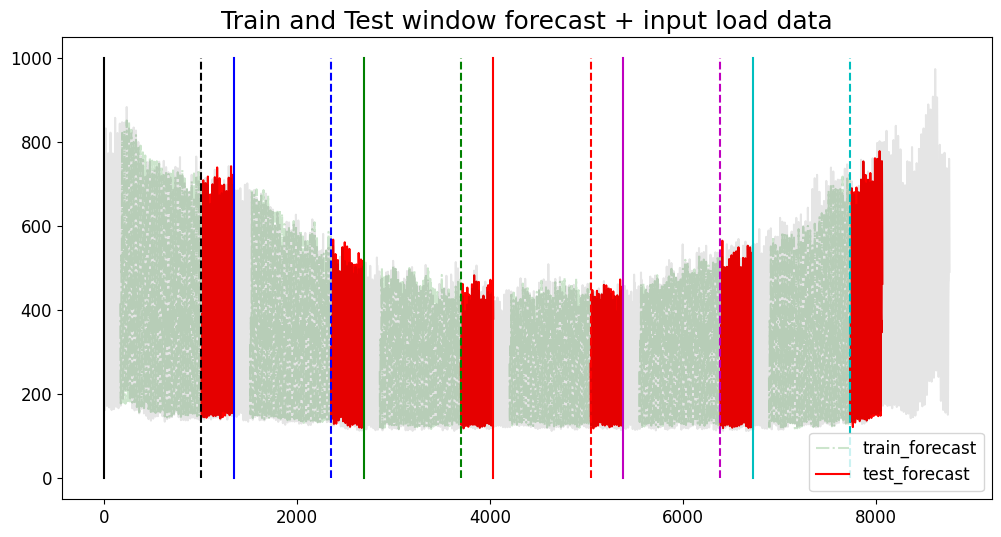

In [ ]:
# plot baseline and predictions over full year

fig = plt.figure(figsize=(12,6))
ax1=plt.subplot(111)

ax1.plot(annForecastPlotSeries['trainPredictPlot'],color='g',linestyle='-.',alpha=0.2,label='train_forecast')
ax1.plot(annForecastPlotSeries['testPredictPlot'],color='r',label='test_forecast')
ax1.plot(aggLoad.values,color='k',alpha=0.1)

# add train and predict windows
#yLim = get_limits(test_predict_plot, decimals=-1)   
yLim=[0,1000]
lineColors = ['k','b','g','r','m','c']
lineStyles = ['solid', 'dashdot','dotted', 'dashed']

for w,win in enumerate(windows):
    ax1.plot(2*[win[0]],[yLim[0],yLim[1]],color=lineColors[w],linestyle='solid') #, label='win'+str(w)+'_start')
    ax1.plot(2*[win[1]],[yLim[0],yLim[1]],color=lineColors[w],linestyle='--')

ax1.tick_params(axis='both', labelsize=12)            
plt.legend(ncol=1,fontsize=12)
ax1.set_title('Train and Test window forecast + input load data',fontsize=18);


# ANN set up for all aggregation levels - Run on COLAB

checklist: 
- check *aggregation_N* set as desired
- check *ANN parameters* as desired
- select if wish to use *normalization* of inputs and targets
- check list of input feature Series AND set series NOT to use for training

Note: To run multiple versions e.g. to incorporate variues sets of load histories: easiestoption is to replicate the main cell below - ensuring results saved to different folders

in follow on cells:
- check filenames for outputs at end e.g. LCL or IRL for London/Ireland etc

In [39]:
loadSeries.keys()

dict_keys(['yData', 'yDataTrain', 'SN24train', 'SN25train', 'SN26train', 'SN168train', 'yDataTest', 'SN24test', 'SN25test', 'SN26test', 'SN168test'])

In [40]:
envSeries.keys()

dict_keys(['tempTrain', 'tempTest', 'dayLightTrain', 'dayLightTest', 'sunsetTrain', 'sunsetTest'])

In [41]:
# define 'do it all' function to run ANN - keep here rather than in FM module as will prbably need to change regularly
# and need to use lots of my functions - already imported if run here

# *args : 'MLR' : use MLR style inputs (i.e. with linear and quadratic terms for env vars etc).
# **kwargs: 'mlrInputTerms' : dictionary e.g. {'trainLength':trainLength,'predLength':predLength,featureLength':featureLength,
#                                             'nDoWterms':6,'nEnvTerms':12,
#                                             'lodSeries':lodSeries,'lags':lags,'PoYlist':PoYlist}

def runAnnAllAggregations(hourly_df,windows,dayClassifier,envSeries,paramsDict,seriesNamesDefaults,\
                          seriesToExclude,loadFormParams,aggregation_N,annParams,annMLPparams,*args,**kwargs):

    #configure special terms required only if using identical ANN inputs as for MLR config
    if 'MLR' in args:
        for key in envSeries.keys():
            if ('train' in key) or ('Train' in key):
                return("Warning: Terminated as full (un-split) envSeries required for 'MLR-style' input")

        if 'mlrInputTerms' not in kwargs:
            return("Warning: Need to provide additional terms to use 'MLR-style' inputs for ANN training")

        mlrTerms = kwargs.get('mlrInputTerms')

        trainLength = mlrTerms['trainLength']
        predLength = mlrTerms['predLength']
        featureLength = mlrTerms['featureLength']
        nDoWterms = mlrTerms['nDoWterms']       
        nEnvTerms = mlrTerms['nEnvTerms']
        lodSeries = mlrTerms['lodSeries']
        PoYlist = mlrTerms['PoYlist']
        lags = mlrTerms['lags']        
        
        # update parameters dictionary    
        paramsDict['trainSeries']=''         # need to have this defined even if not applicable (eg MLR inputs)
        for key,value in mlrTerms.items():   
            #if not isinstance(value,np.ndarray):
            if key != 'PoYlist':
                paramsDictName = 'mlrInputTerms_'+str(key)
                paramsDict[paramsDictName]=value


    # END special config for MLR type inputs
    
    # create empty dictionary to hold dataframes with error stats for each aggregation level
    errorsAggANN_dict = {}       # TEST ERRORS
    errorsAggANNtrain_dict = {}  # TRAIN ERRORS

    #initialize dict to hold forecast series and N-level aggregate loads
    annTrainPredict_dict = {}    # forecasts for TRAIN windows
    annTestPredict_dict = {}     # forecasts for TEST windows  - not needed as stored in previous 
    grpAggLoad_N_dict = {}       # group aggregate loads AND record of userIDs in each grp

    for N in aggregation_N:    
        # Run 'out of sample' selection of random user subsets of size N - assemble userID df
        df_randIDgrps_N = randomUserGroups(hourly_df,N)

        # loop through randID groups and get aggregate load series for each - assemble load series df
        df_grpAggLoad_N = randomUserGroupAggregate(hourly_df,df_randIDgrps_N)

        #********USE THIS NEXT LINE FOR N subset TEST CASE  *********
        # is using this, comment out previous random* calls
        #df_grpAggLoad_N = grpAggLoad_N_TEST[str(N)]['grpAggLoad_N']


        #initialize df to hold forecast series for N
        annTrainPredict_df = pd.DataFrame()
        annTestPredict_df = pd.DataFrame()

        #initialize dataFrame to hold error stats for N
        df_errorsAgg_N_MAPEs_ANN = pd.DataFrame()
        df_errorsAgg_N_MCVs_ANN = pd.DataFrame()
        df_errorsAgg_N_MNRMSEs_ANN = pd.DataFrame()
        df_errorsAgg_N_MAEs_ANN = pd.DataFrame()

        df_errorsAgg_N_MAPEs_ANNtrain = pd.DataFrame() 
        df_errorsAgg_N_MCVs_ANNtrain = pd.DataFrame()
        df_errorsAgg_N_MNRMSEs_ANNtrain = pd.DataFrame()
        df_errorsAgg_N_MAEs_ANNtrain = pd.DataFrame()

        columns=[]  # df column names

        #Loop through each aggregate group of size N
        for i,col in  enumerate(df_grpAggLoad_N.columns):
            #print("i {0}, col {1}".format(i,col))

            load = df_grpAggLoad_N[col]
            #print("Aggregate {0}, series length {1}".format(col,load.shape[0]))

            # collate load series for train and predict windows
            loadSeries = set_loadSeries(windows,load,\
                                        loadFormParams['loadSeriesList'],loadFormParams['loadSeriesOffsetsWinStart'],\
                                        loadFormParams['loadSeriesLags'],loadFormParams['loadSeriesWindows']\
                                       )  # return dictionary of all load series 

            # ** Next Block for 'standard' ANN inputs : 1) make dow series 2) set series Names 3) merge load/env/dow series to dfs
            #                                           4) train/test split 5) drop unwanted series 6) convert dfs to np 

            if 'MLR' not in args:              # use 'standard' inputs to ANN training

                # get DayOfWeek classifier : Tue to Fri, Sat to Mon : shouldn't change since all loads have same dattime index range?
                dowSeries = set_dowSeries(windows,load,dayClassifier)

                # reset list of input features to defaults 
                loadTrainNames = seriesNamesDefaults['loadTrainNamesDefaults']
                loadTestNames = seriesNamesDefaults['loadTestNamesDefaults'] 
                envTrainNames= seriesNamesDefaults['envTrainNamesDefaults']
                envTestNames= seriesNamesDefaults['envTestNamesDefaults'] 

                # split training and test data
                df_Train = create_TrainPredict_df(loadTrainNames,loadSeries,envTrainNames,envSeries,['dowTrain'],dowSeries)
                df_Test = create_TrainPredict_df(loadTestNames,loadSeries,envTestNames,envSeries,['dowTest'],dowSeries)       

                # decide which columns to keep for ANN training and testing (from defaults above) and convert to numpy for MLP
                trainSeries,testSeries = get_TrainTestSeries(df_Train,df_Test)

                # drop some series if specified e.g. sunset 
                for series in seriesToExclude['trainSeriesToExclude']:     
                    trainSeries.remove(series)
                for series in seriesToExclude['testSeriesToExclude']:
                    testSeries.remove(series) 

                # update parameters dictionary    #only need to update once since names won't change 
                if i==0:
                    paramsDict['trainSeries']=trainSeries

                #convert inputs to np arrays for MLP
                aggTrainingData  = df_Train[trainSeries].values    
                aggTestingData = df_Test[testSeries].values                        

                # set target load series for ANN training and testing
                aggLoadTrain =  df_Train[['yDataTrain']].values
                aggLoadTest =  df_Test[['yDataTest']].values     
            
            # ** next Block for 'MLR type' inputs : identical 'allFeatures' config as per MLR with linear and quadratic env terms
            #                                       1) populate allFeatures np array 2) train/test split
            
            else:                    # using 'MLR style' input np array of features
                                   
                #populate allFeatures:
                Features = populate_AllFeatures(windows,featureLength,loadSeries['yData'],load,\
                                     envSeries['temp'],dayClassifier,timeLists,nEnvTerms ,PoY=PoYlist,\
                                    LoD=envSeries[lodSeries],lags=lags,nDoWterms=nDoWterms)      

                # plot day class of allFeaturesTrain - error checking; 
                if (i==0):
                    plot_allFeatures(nEnvTerms+2,1,Features,windowLength=2*168)   # plot 1 of t-24 terms   

                #set train and test features
                aggTrainingData,aggTestingData = create_TrainPredictSeries(trainLength,predLength,Features,windows,nEnvTerms,nDoWterms)

                #set target features
                aggLoadTrain = loadSeries['yDataTrain'].values
                aggLoadTest = loadSeries['yDataTest'].values
            

            if use_Normalization == True:
                # Run NORMALIZATION of inputs and targets
                MinMax_SC_trainingData = MinMaxScaler()
                MinMax_SC_testingData = MinMaxScaler()
                MinMax_SC_trainingLoad = MinMaxScaler()
                MinMax_SC_testingLoad = MinMaxScaler()

                aggTrainingDataNormalized = MinMax_SC_trainingData.fit_transform(aggTrainingData)
                aggTestingDataNormalized = MinMax_SC_testingData.fit_transform(aggTestingData)
                aggLoadTrainNormalized = MinMax_SC_trainingLoad.fit_transform(aggLoadTrain.reshape(-1,1))
                aggLoadTestNormalized = MinMax_SC_testingLoad.fit_transform(aggLoadTest.reshape(-1,1))

                scalers={'sc1':MinMax_SC_trainingData,'sc2':MinMax_SC_testingData,'sc3':MinMax_SC_trainingLoad,'sc4':MinMax_SC_testingLoad}

            # set appropriate train/target arrays
            if use_Normalization == True:
                trainData=aggTrainingDataNormalized
                testData=aggTestingDataNormalized
                trainTarget=aggLoadTrainNormalized
                testTarget=aggLoadTestNormalized
            else:
                trainData=aggTrainingData
                testData=aggTestingData
                trainTarget=aggLoadTrain
                testTarget=aggLoadTest
                               
            # now run ANN  - track time for each loop (grp)
            start_time = time.time()

            #create MLP model: trainDataSeries,nodesPerHiddenLayer,numInputFeatures; default weights init.
            mdl = create_MLP(trainData,annParams['nNodes'],trainData.shape[1])      

            # specify loss function AND optimizer (search technique used to update weights)
            mdl.compile(loss=annMLPparams['lossFunction'], optimizer=annMLPparams['optimizer'],\
                        metrics=annMLPparams['metrics'])  

            #fit model
            history = mdl.fit(trainData, trainTarget, epochs=annParams['nEpochs'], batch_size=annParams['batchSize'],\
                              verbose=0,validation_split=annParams['val_split'])  #,callbacks = callbacks  
            print("For agg level {0},{1},-- {2} seconds to run ANN fit, current time{3}".\
                  format(N,col,(time.time()-start_time),datetime.now().strftime("%H:%M:%S")) )

            # plot loss function (for subset )- check loss and val_loss both show consistent downward trend )
            if (i % 30) == 0:                     
                historyPlot(history,N=N,col=col)  

            # estimate model performance 
            train_score = mdl.evaluate(trainData, trainTarget, verbose=0)
            test_score = mdl.evaluate(testData, testTarget, verbose=0)
            print('Train Score: {:.2f} MSE ({:.2f} RMSE) Test Score: {:.2f} MSE ({:.2f} RMSE)'.\
                  format(train_score[0], math.sqrt(train_score[0]),test_score[0],math.sqrt(test_score[0])))

            # generate predictions 
            train_predict = mdl.predict(trainData)
            test_predict = mdl.predict(testData)
            test_predict=np.squeeze(test_predict)                                   # remove redundant dimensions from array shape
            train_predict=np.squeeze(train_predict)
            annForecast={'trainPredict':train_predict,'testPredict':test_predict}   # create dictionary of forecast series

            #now need to RESCALE forecast if used normalisation of inputs,target etc
            if annParams['use_Normalization'] == True:
                annForecast['trainPredict']=scalers['sc3'].inverse_transform(annForecast['trainPredict'].reshape(-1,1))
                annForecast['testPredict']=scalers['sc4'].inverse_transform(annForecast['testPredict'].reshape(-1,1))   

            # save annForecast dictionary for each N,grp: append results for current grp to annTrainPredict_df, annTestPredict_df 
            annTrainPredict_df = pd.concat([annTrainPredict_df,pd.DataFrame(annForecast['trainPredict'])],axis=1)
            annTestPredict_df = pd.concat([annTestPredict_df,pd.DataFrame(annForecast['testPredict'])],axis=1)

            # calculate forecast errors for TRAIN periods (for current grp)
            modelsANN = {'ANN_MPL': annForecast['trainPredict']}  # create dictionary of model names for forecast period
            errorsANNtrain = get_errors(loadSeries['yDataTrain'],modelsANN)
            print("......Training window errors: Mapes: {0}, MCVs: {1}, MNRMSEs: {2}".format\
                          (errorsANNtrain['MAPEs'],errorsANNtrain['MCVs'],errorsANNtrain['MNRMSEs']))

            # put TRAIN errors (for current grp) in df with nrows = nModels (1 for now); nCols = nErrorTypes
            df_errorsANNtrain = pd.DataFrame.from_dict(errorsANNtrain)
            df_errorsANNtrain['models']=list(modelsANN.keys())
            df_errorsANNtrain = df_errorsANNtrain.set_index('models')

            # calculate forecast errors for TEST periods (for current grp)
            modelsANN = {'ANN_MPL': annForecast['testPredict']}  ## create dictionary of model names for forecast period
            errorsANN = get_errors(loadSeries['yDataTest'],modelsANN)
            print("......Test window errors: Mapes: {0}, MCVs: {1}, MNRMSEs: {2}\n".format(errorsANN['MAPEs'],errorsANN['MCVs'],errorsANN['MNRMSEs']))

            # put TEST errors (for current grp)  in df with nrows = nModels (1 for now); nCols = nErrorTypes
            df_errorsANN = pd.DataFrame.from_dict(errorsANN)
            df_errorsANN['models']=list(modelsANN.keys())
            df_errorsANN = df_errorsANN.set_index('models')

            #add col (for current grp) to errors df for MAPEs, etc (TRAIN errors)
            columns.append(col)
            df_errorsAgg_N_MAPEs_ANNtrain = pd.concat([df_errorsAgg_N_MAPEs_ANNtrain,pd.DataFrame(errorsANNtrain['MAPEs'])],axis=1)
            df_errorsAgg_N_MCVs_ANNtrain = pd.concat([df_errorsAgg_N_MCVs_ANNtrain,pd.DataFrame(errorsANNtrain['MCVs'])],axis=1)
            df_errorsAgg_N_MNRMSEs_ANNtrain = pd.concat([df_errorsAgg_N_MNRMSEs_ANNtrain,pd.DataFrame(errorsANNtrain['MNRMSEs'])],axis=1)

            #add col (for current grp) to errors df for MAPEs, etc (TEST errors)
            df_errorsAgg_N_MAPEs_ANN = pd.concat([df_errorsAgg_N_MAPEs_ANN,pd.DataFrame(errorsANN['MAPEs'])],axis=1)
            df_errorsAgg_N_MCVs_ANN = pd.concat([df_errorsAgg_N_MCVs_ANN,pd.DataFrame(errorsANN['MCVs'])],axis=1)
            df_errorsAgg_N_MNRMSEs_ANN = pd.concat([df_errorsAgg_N_MNRMSEs_ANN,pd.DataFrame(errorsANN['MNRMSEs'])],axis=1)
            #df_errorsAgg_N_MAEs_ANN = pd.concat([df_errorsAgg_N_MNRMSEs_ANN,pd.DataFrame(errorsANN['MAEs'])],axis=1)

            #plot forecast for every ?th grp 
            if (i % 30) == 0:

                # shift train predictions to align with hr/day indices ie unpack into actual time bands (for PLOTTING)
                annForecastPlotSeries = annPlotInputs(load,windows,annForecast)

                # plot forecast for 1 week (i.e. [-168,+168]) each side of train/test window edge
                #annPlot(aggLoad,annForecastPlotSeries,windows)                # plot for all periods 
                annPlot(load,annForecastPlotSeries,windows,numPlots=1,viewWin=[-168,168],\
                       figTitle=('MLP with' + str(annParams['nNodes'])+' nodes : window 0, agg N:'+str(N) + ',grp:',str(col)))

        # give useful column names to forecast and errors dataframes before store in dictionary
        for df in [df_errorsAgg_N_MAPEs_ANN,df_errorsAgg_N_MCVs_ANN,df_errorsAgg_N_MNRMSEs_ANN]: #,df_errorsAgg_N_MAEs_ANN]:
            df.columns = columns
            df.index = ['ANN_MLP']
        for df in [df_errorsAgg_N_MAPEs_ANNtrain,df_errorsAgg_N_MCVs_ANNtrain,df_errorsAgg_N_MNRMSEs_ANNtrain]: #,df_errorsAgg_N_MAEs_ANNtrain]:
            df.columns = columns
            df.index = ['ANN_MLP']

        for df in [annTrainPredict_df,annTestPredict_df]:
            df.columns = columns
            #df.index = ['']

        # append to dictionaries (for latest N level), dataframes of errors, training and prediction window forecasts and input load datasets

        d={}
        d['MAPEs'] = df_errorsAgg_N_MAPEs_ANNtrain
        d['MCVs'] =  df_errorsAgg_N_MCVs_ANNtrain
        d['MRMSEs'] = df_errorsAgg_N_MNRMSEs_ANNtrain
        #d['MAEs_ANN'] = df_errorsAgg_N_MAEs_ANNtrain
        errorsAggANNtrain_dict['%d' % (N)] = d               # train errrors dictionary

        d={}
        d['MAPEs'] = df_errorsAgg_N_MAPEs_ANN
        d['MCVs'] =  df_errorsAgg_N_MCVs_ANN
        d['MRMSEs'] = df_errorsAgg_N_MNRMSEs_ANN
        #d['MAEs_ANN'] = df_errorsAgg_N_MAEs_ANN
        errorsAggANN_dict['%d' % (N)] = d                    # test errrors dictionary

        d={}
        d['trainPredictSeries'] = annTrainPredict_df
        d['testPredictSeries'] = annTestPredict_df   
        annTrainPredict_dict['%d' % (N)] = d                # train and test window forecasts dictionary 

        #use to store sub-aggregate load series
        d={}
        d['randIDgrps_N'] = df_randIDgrps_N
        d['grpAggLoad_N'] = df_grpAggLoad_N
        grpAggLoad_N_dict['%d' % (N)] = d                   # aggregate loads (by N, grp) + corresponding grp userIDs 

    return(paramsDict,errorsAggANNtrain_dict,errorsAggANN_dict,annTrainPredict_dict,grpAggLoad_N_dict)

In [42]:
# define function to save all ANN result to disk - keep here for now ratrher than in module

def saveAnnConfigXresults(paramsDict,root,globPrefix,config,aggregation_N,normalizedBool,resultsDictionaries):

    dirName = get_save_folderName(paramsDict,root=root,globPrefix=globPrefix,\
                              config=config,aggregation_N=aggregation_N,normalized=normalizedBool)

    create_save_folder(dirName)

    #save dictionaries to pickle file: TEST errors, TRAIN errors,Forecast series,N level aggregate load series
    pklsToSave=[]
    for dictName in resultsDictionaries.keys():
        pickleFileName = '/' + str(dictName) +'.pickle'
        pklsToSave.append(pickleFileName)

    for pklfile,dictName,dict in zip(pklsToSave,resultsDictionaries.keys(),resultsDictionaries.values()):
        with open(dirName+pklfile, 'wb') as f:
            pickle.dump(dict, f, protocol=pickle.HIGHEST_PROTOCOL)
        print("dictionary {0} saved to pickle file {1}".format(dictName,pklfile))

    #save parameters used to json file 
    with open(dirName+'/paramsDict.json', 'w') as f:
        json.dump(paramsDict, f)
        f.close()    


# 1st configuration: 
t-24,t-25,t-26,t-168 load series + temperature, dayLight hrs, weekday/weekend classifier

Note: For total aggregate case, load series pre-defined so used keys to make train, test series names lists     
      However,for iterative aggregation by N, load series not pre-defined so need to define train,test series         names in config .

NB: review next cell carefully for each config  

In [43]:
## define CONFIG1 inputs 

# load series list to use - ** UPDATE list FOR EACH NEW CONFIGURATION **MUST have 'yData','yDataTrain','yDataTest'
loadSeriesList = ['yData',\
                  'yDataTrain','SN24train','SN25train','SN26train','SN168train',\
                  'yDataTest','SN24test','SN25test','SN26test','SN168test']        # set load series names 

# set default (maximal) input features lists *** UPDATE IF ADD NEW SERIES above  **
loadTrainNamesDefaults = ['yDataTrain','SN24train','SN25train','SN26train','SN168train']
loadTestNamesDefaults = [ 'yDataTest','SN24test','SN25test','SN26test','SN168test']
envTrainNamesDefaults = ['tempTrain','dayLightTrain','sunsetTrain']
envTestNamesDefaults = ['tempTest','dayLightTest','sunsetTest']
seriesNamesDefaults = {'loadTrainNamesDefaults':loadTrainNamesDefaults,'loadTestNamesDefaults':loadTestNamesDefaults,\
                           'envTrainNamesDefaults':envTrainNamesDefaults,'envTestNamesDefaults':envTestNamesDefaults}

#select any series NOT to use in training (by default, all series above will be used)

# ** UPDATE exclude lists FOR EACH CONFIG **
trainSeriesToExclude = ['sunsetTrain']  ## use dayLight as length of day variable
testSeriesToExclude = ['sunsetTest']
seriesToExclude = {'trainSeriesToExclude':trainSeriesToExclude,'testSeriesToExclude':testSeriesToExclude}

# set appropriate offsets,lags, etc for load series forming
numSeries=0
for series in loadSeriesList:    # count number of train (=number of test) load series
    if ('train' in series) or ('Train' in series):
        numSeries+=1
loadSeriesOffsetsWinStart = [168] + [168]*numSeries + [0]*numSeries  # set offsets from each window start (max time lag=168)

# *** UPDATE loadSeriesLags FOR EACH NEW CONFIGURATION but ONLY if loadSeriesList changes **
#  number of elements should match loadSeriesList etc (this is before we drop any)
loadSeriesLags = [0]+[0,24,25,26,168]*2                              # set lag terms for each load series (t-lag)
loadSeriesWindows  = np.array([0,3]+[0,1]*numSeries+[2,3]*numSeries).reshape(-1,2)    # set windows for each series range
loadFormParams = {'loadSeriesList':loadSeriesList,'loadSeriesOffsetsWinStart':loadSeriesOffsetsWinStart,\
                  'loadSeriesLags':loadSeriesLags,'loadSeriesWindows':loadSeriesWindows}
 
#aggregation_N = [600]  # for testing   # < 675 users 
#aggregation_N = [5,10,20,30,40,50,75,100]
aggregation_N = [1,3,5,10,20,30,40,50,75,100]

# set ANN parameters
numHL=2  # 2 seemed to work better for aggregate for Irl data
nNodes = 20  # nodes for hidden ANN layers
nEpochs = 100 # number of training cycles in fitting
batchSize = 32  # batch size 
val_split=0.2

#  select whether to use normalised or original inputs,targets
use_Normalization=True
#use_Normalization=False 
annParams = {'numHL':numHL,'nNodes':nNodes,'nEpochs':nEpochs,'batchSize':batchSize,'val_split':val_split,\
            'use_Normalization':use_Normalization}

lossFunction = 'mean_squared_error'
optimizer = 'adam'                   # adam = gradient descent type optimizer;   
metrics = ['mean_squared_error']     # Note: can't use 'accuracy' metric since bot a classifcation problem
annMLPparams = {'lossFunction':lossFunction,'optimizer':optimizer,'metrics':metrics}

# save parameters to dictionary for saving to disk as json file - gets appended later
paramsDict = {'numHL':numHL,'nNodes':nNodes,'nEpochs':nEpochs,'batchSize':batchSize,'val_split':val_split,\
              'lossFunction':lossFunction,'optimizer':optimizer,'metrics':metrics,\
              'use_normalization':use_Normalization}

In [ ]:
# Run CONFIG1: # loop through all aggregation levels *** BEST TO DO FULL RUN ON COLAB **
config='config1'
paramsDict,errorsAggANNtrain_dict,errorsAggANN_dict,annTrainPredict_dict,grpAggLoad_N_dict = \
    runAnnAllAggregations(hourly_df,windows,dayClassifier,envSeries,paramsDict,seriesNamesDefaults,\
        seriesToExclude,loadFormParams,aggregation_N,annParams,annMLPparams)

resultsDictionaries={'errorsAggANNtrain_dict':errorsAggANNtrain_dict,
                     'errorsAggANN_dict':errorsAggANN_dict,'annTrainPredict_dict':annTrainPredict_dict,
                     'grpAggLoad_N_dict':grpAggLoad_N_dict}

# save ***CONFIG1*** results
root='./project_data/intermediateDataIreland/'
globPrefix='IRL_ANN*'
saveAnnConfigXresults(paramsDict,root,globPrefix,config,aggregation_N,annParams['use_Normalization'],resultsDictionaries)


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
!zip -r /content/IrlFiles3_config1.zip /content/project_data/intermediateDataIreland
!ls
from google.colab import files
files.download("/content/IrlFiles3_config1.zip") 

  adding: content/project_data/intermediateDataIreland/ (stored 0%)
  adding: content/project_data/intermediateDataIreland/CER_Data_Step6.hourly_df.pkl (deflated 69%)
  adding: content/project_data/intermediateDataIreland/IRL_ANN_config1run1_ALLincl1_Normalised_HL2_Nodes20_Epochs100_BatchSize32_nFeat8/ (stored 0%)
  adding: content/project_data/intermediateDataIreland/IRL_ANN_config1run1_ALLincl1_Normalised_HL2_Nodes20_Epochs100_BatchSize32_nFeat8/paramsDict.json (deflated 39%)
  adding: content/project_data/intermediateDataIreland/IRL_ANN_config1run1_ALLincl1_Normalised_HL2_Nodes20_Epochs100_BatchSize32_nFeat8/annTrainPredict_dict.pickle (deflated 11%)
  adding: content/project_data/intermediateDataIreland/IRL_ANN_config1run1_ALLincl1_Normalised_HL2_Nodes20_Epochs100_BatchSize32_nFeat8/grpAggLoad_N_dict.pickle (deflated 66%)
  adding: content/project_data/intermediateDataIreland/IRL_ANN_config1run1_ALLincl1_Normalised_HL2_Nodes20_Epochs100_BatchSize32_nFeat8/errorsAggANNtrain_dict.pic

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 2nd configuration: 
t-24,t-168 load series + temperature, dayLight hrs, weekday/weekend classifier       
only parameters that have changed since config1 are updated (assume config 1 set first)

In [44]:
# define CONFIG2 inputs : only parameters that change since config1

#select any series NOT to use in training (by default, all series above will be used)
trainSeriesToExclude = ['SN25train','SN26train','sunsetTrain']  ## use dayLight as length of day variable
testSeriesToExclude = ['SN25test','SN26test','sunsetTest']
seriesToExclude = {'trainSeriesToExclude':trainSeriesToExclude,'testSeriesToExclude':testSeriesToExclude}


# reset : save parameters to dictionary for saving to disk as json file - gets appended later
paramsDict = {'numHL':numHL,'nNodes':nNodes,'nEpochs':nEpochs,'batchSize':batchSize,'val_split':val_split,\
              'lossFunction':lossFunction,'optimizer':optimizer,'metrics':metrics,\
              'use_normalization':use_Normalization}

In [ ]:
# Run CONFIG2: # loop through all aggregation levels *** BEST TO DO FULL RUN ON COLAB **

config='config2'
paramsDict,errorsAggANNtrain_dict,errorsAggANN_dict,annTrainPredict_dict,grpAggLoad_N_dict = \
    runAnnAllAggregations(hourly_df,windows,dayClassifier,envSeries,paramsDict,seriesNamesDefaults,\
                          seriesToExclude,loadFormParams,aggregation_N,annParams,annMLPparams)

resultsDictionaries={'errorsAggANNtrain_dict':errorsAggANNtrain_dict,
                     'errorsAggANN_dict':errorsAggANN_dict,'annTrainPredict_dict':annTrainPredict_dict,
                     'grpAggLoad_N_dict':grpAggLoad_N_dict}

# save ***CONFIG2*** results
root='./project_data/intermediateDataIreland/'
globPrefix='IRL_ANN*'
saveAnnConfigXresults(paramsDict,root,globPrefix,config,aggregation_N,annParams['use_Normalization'],resultsDictionaries)



Output hidden; open in https://colab.research.google.com to view.

In [ ]:
!zip -r /content/IrlFiles3_config2.zip /content/project_data/intermediateDataIreland
!ls
from google.colab import files
files.download("/content/IrlFiles3_config2.zip") 

  adding: content/project_data/intermediateDataIreland/ (stored 0%)
  adding: content/project_data/intermediateDataIreland/CER_Data_Step6.hourly_df.pkl (deflated 69%)
  adding: content/project_data/intermediateDataIreland/Dublin_Temperature.csv (deflated 85%)
  adding: content/project_data/intermediateDataIreland/Dublin_LengthOfDayData.csv (deflated 89%)
  adding: content/project_data/intermediateDataIreland/IRL_ANN_config2run1_ALLincl1_Normalised_HL2_Nodes20_Epochs100_BatchSize32_nFeat6/ (stored 0%)
  adding: content/project_data/intermediateDataIreland/IRL_ANN_config2run1_ALLincl1_Normalised_HL2_Nodes20_Epochs100_BatchSize32_nFeat6/paramsDict.json (deflated 35%)
  adding: content/project_data/intermediateDataIreland/IRL_ANN_config2run1_ALLincl1_Normalised_HL2_Nodes20_Epochs100_BatchSize32_nFeat6/annTrainPredict_dict.pickle (deflated 11%)
  adding: content/project_data/intermediateDataIreland/IRL_ANN_config2run1_ALLincl1_Normalised_HL2_Nodes20_Epochs100_BatchSize32_nFeat6/grpAggLoad_N

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 3rd configuration: 
t-24,t-25,t-26,t-27,t-28,t-168 load series + temperature, dayLight hrs, weekday/weekend classifier       
only parameters that have changed since config1 are updated 


In [45]:
# define CONFIG3 inputs : only parameters that change since config2

# ADD MORE LAGS T-27,T-28

# load series list to use - ** UPDATE list FOR EACH NEW CONFIGURATION **MUST have 'yData','yDataTrain','yDataTest'
loadSeriesList = ['yData',\
                  'yDataTrain','SN24train','SN25train','SN26train','SN27train','SN28train','SN168train',\
                  'yDataTest','SN24test','SN25test','SN26test','SN27test','SN28test','SN168test']        # set load series names 

# set default (maximal) input features lists *** UPDATE IF ADD NEW SERIES above  **
loadTrainNamesDefaults = ['yDataTrain','SN24train','SN25train','SN26train','SN27train','SN28train','SN168train']
loadTestNamesDefaults = [ 'yDataTest','SN24test','SN25test','SN26test','SN27test','SN28test','SN168test']
seriesNamesDefaults = {'loadTrainNamesDefaults':loadTrainNamesDefaults,'loadTestNamesDefaults':loadTestNamesDefaults,\
                           'envTrainNamesDefaults':envTrainNamesDefaults,'envTestNamesDefaults':envTestNamesDefaults}

# ** UPDATE exclude lists FOR EACH CONFIG **
trainSeriesToExclude = ['sunsetTrain']  ## use dayLight as length of day variable
testSeriesToExclude = ['sunsetTest']
seriesToExclude = {'trainSeriesToExclude':trainSeriesToExclude,'testSeriesToExclude':testSeriesToExclude}

# set appropriate offsets,lags, etc for load series forming
numSeries=0
for series in loadSeriesList:    # count number of train (=number of test) load series
    if ('train' in series) or ('Train' in series):
        numSeries+=1
loadSeriesOffsetsWinStart = [168] + [168]*numSeries + [0]*numSeries  # set offsets from each window start (max time lag=168)

# *** UPDATE loadSeriesLags FOR EACH NEW CONFIGURATION but ONLY if loadSeriesList changes **
#  number of elements should match loadSeriesList etc (this is before we drop any)
loadSeriesLags = [0]+[0,24,25,26,27,28,168]*2                              # set lag terms for each load series (t-lag)
loadSeriesWindows  = np.array([0,3]+[0,1]*numSeries+[2,3]*numSeries).reshape(-1,2)    # set windows for each series range
loadFormParams = {'loadSeriesList':loadSeriesList,'loadSeriesOffsetsWinStart':loadSeriesOffsetsWinStart,\
                  'loadSeriesLags':loadSeriesLags,'loadSeriesWindows':loadSeriesWindows}
 
# Reset : save parameters to dictionary for saving to disk as json file - gets appended later
paramsDict = {'numHL':numHL,'nNodes':nNodes,'nEpochs':nEpochs,'batchSize':batchSize,'val_split':val_split,\
              'lossFunction':lossFunction,'optimizer':optimizer,'metrics':metrics,\
              'use_normalization':use_Normalization}

In [ ]:
# Run CONFIG3: # loop through all aggregation levels *** BEST TO DO FULL RUN ON COLAB **
config='config3'
paramsDict,errorsAggANNtrain_dict,errorsAggANN_dict,annTrainPredict_dict,grpAggLoad_N_dict = \
    runAnnAllAggregations(hourly_df,windows,dayClassifier,envSeries,paramsDict,seriesNamesDefaults,\
                          seriesToExclude,loadFormParams,aggregation_N,annParams,annMLPparams)

resultsDictionaries={'errorsAggANNtrain_dict':errorsAggANNtrain_dict,
                     'errorsAggANN_dict':errorsAggANN_dict,'annTrainPredict_dict':annTrainPredict_dict,
                     'grpAggLoad_N_dict':grpAggLoad_N_dict}

# save ***CONFIG3*** results
root='./project_data/intermediateDataIreland/'
globPrefix='IRL_ANN*'
saveAnnConfigXresults(paramsDict,root,globPrefix,config,aggregation_N,annParams['use_Normalization'],resultsDictionaries)



Output hidden; open in https://colab.research.google.com to view.

In [ ]:
!zip -r /content/IrlFiles3_config3.zip /content/project_data/intermediateDataIreland
!ls
from google.colab import files
files.download("/content/IrlFiles3_config3.zip") 

  adding: content/project_data/intermediateDataIreland/ (stored 0%)
  adding: content/project_data/intermediateDataIreland/CER_Data_Step6.hourly_df.pkl (deflated 69%)
  adding: content/project_data/intermediateDataIreland/Dublin_Temperature.csv (deflated 85%)
  adding: content/project_data/intermediateDataIreland/IRL_ANN_config3run1_ALLincl1_Normalised_HL2_Nodes20_Epochs100_BatchSize32_nFeat10/ (stored 0%)
  adding: content/project_data/intermediateDataIreland/IRL_ANN_config3run1_ALLincl1_Normalised_HL2_Nodes20_Epochs100_BatchSize32_nFeat10/paramsDict.json (deflated 42%)
  adding: content/project_data/intermediateDataIreland/IRL_ANN_config3run1_ALLincl1_Normalised_HL2_Nodes20_Epochs100_BatchSize32_nFeat10/errorsAggANNtrain_dict.pickle (deflated 58%)
  adding: content/project_data/intermediateDataIreland/IRL_ANN_config3run1_ALLincl1_Normalised_HL2_Nodes20_Epochs100_BatchSize32_nFeat10/errorsAggANN_dict.pickle (deflated 57%)
  adding: content/project_data/intermediateDataIreland/IRL_ANN_

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 4th configuration: 
MLR fromat inputs : linear and quadratic terms of temperature and daylight + 
    t-24,t-168 load terms (*dow classifiers)        


In [46]:
# Use this IF wish to use MLR-style input numpy array for ANN training 
# 'ALL' arg => collate train+test in one section i.e. DON't SPLIT into train/test series.

envSeries = set_envSeries(windows,'ALL',temp=hourlyTemp,dayLight=hourlyDayLight,sunset=hourlySunset)

for k,v in envSeries.items():
    print("env series:{0},length:{1},type:{2},first val:{3}".format(k,len(v),type(v),v[0]))


env series:temp,length:7056,type:<class 'numpy.ndarray'>,first val:-7.55
env series:dayLight,length:7056,type:<class 'numpy.ndarray'>,first val:9.204722222222221
env series:sunset,length:7056,type:<class 'numpy.ndarray'>,first val:16.429444444444446


In [48]:
# define CONFIG4 inputs (MLR style inputs)

# load series list to use - ** UPDATE list FOR EACH NEW CONFIGURATION **MUST have 'yData','yDataTrain','yDataTest'
loadSeriesList = ['yData',\
                  'yDataTrain','SN24train','SN25train','SN26train','SN168train',\
                  'yDataTest','SN24test','SN25test','SN26test','SN168test']        # set load series names 

#*************************
# Next blocks only needed for standard ANN inputs BUT code requires them to be defined even if using MLR style inputs

# set default (maximal) input features lists *** UPDATE IF ADD NEW SERIES above  **
loadTrainNamesDefaults = ['yDataTrain','SN24train','SN25train','SN26train','SN168train']
loadTestNamesDefaults = [ 'yDataTest','SN24test','SN25test','SN26test','SN168test']
envTrainNamesDefaults = ['tempTrain','dayLightTrain','sunsetTrain']
envTestNamesDefaults = ['tempTest','dayLightTest','sunsetTest']
seriesNamesDefaults = {'loadTrainNamesDefaults':loadTrainNamesDefaults,'loadTestNamesDefaults':loadTestNamesDefaults,\
                           'envTrainNamesDefaults':envTrainNamesDefaults,'envTestNamesDefaults':envTestNamesDefaults}

#select any series NOT to use in training (by default, all series above will be used)
trainSeriesToExclude = ['sunsetTrain']  ## use dayLight as length of day variable
testSeriesToExclude = ['sunsetTest']
seriesToExclude = {'trainSeriesToExclude':trainSeriesToExclude,'testSeriesToExclude':testSeriesToExclude}
#*************************


# set appropriate offsets,lags, etc for load series forming
numSeries=0
for series in loadSeriesList:    # count number of train (=number of test) load series
    if ('train' in series) or ('Train' in series):
        numSeries+=1
loadSeriesOffsetsWinStart = [168] + [168]*numSeries + [0]*numSeries  # set offsets from each window start (max time lag=168)

# *** UPDATE loadSeriesLags FOR EACH NEW CONFIGURATION but ONLY if loadSeriesList changes **
#  number of elements should match loadSeriesList etc (this is before we drop any)
loadSeriesLags = [0]+[0,24,25,26,168]*2                              # set lag terms for each load series (t-lag)
loadSeriesWindows  = np.array([0,3]+[0,1]*numSeries+[2,3]*numSeries).reshape(-1,2)    # set windows for each series range
loadFormParams = {'loadSeriesList':loadSeriesList,'loadSeriesOffsetsWinStart':loadSeriesOffsetsWinStart,\
                  'loadSeriesLags':loadSeriesLags,'loadSeriesWindows':loadSeriesWindows}
 
#aggregation_N = [600]  # for testing   # < 675 users 
#aggregation_N = [5,10,20,30,40,50,75,100]
aggregation_N = [1,3,5,10,20,30,40,50,75,100]

#******* PARAMETERS FROM MLR CONFIG *******
lodSeries='dayLight'  # need defined even if not used
nEnvTerms=12          # use Temperature as only env param 
nDoWterms=6           # use t-24,t-168 loads
lags=[24,168]
h1=np.arange(0,sum(daynum[0:6])); h2=np.arange(sum(daynum[0:6]),sum(daynum[0:12]))  # PeriodOfYear :1st/2md half of year 
PoYlist=[h1,h2]   
mlrInputTerms = {'trainLength':trainLength,'predLength':predLength,'featureLength':featureLength,\
                'nDoWterms':nDoWterms,'nEnvTerms':nEnvTerms,'lodSeries':lodSeries,'lags':lags,'PoYlist':PoYlist}


# set ANN parameters
numHL=1  # 1 was fine for LCL data (grid search), 2 seemed to work better for aggregate for Irl data (for standardr ANN input)
nNodes = 30  # nodes for hidden ANN layers  # using 30 nodes where MLR style inputs 
nEpochs = 100 # number of training cycles in fitting
batchSize = 32  # batch size
val_split=0.2

#  select whether to use normalised or original inputs,targets
#use_Normalization=True
use_Normalization=False  # better for MLR based on aggregate forecast tests
annParams = {'numHL':numHL,'nNodes':nNodes,'nEpochs':nEpochs,'batchSize':batchSize,'val_split':val_split,\
            'use_Normalization':use_Normalization}

lossFunction = 'mean_squared_error'
optimizer = 'adam'                   # adam = gradient descent type optimizer;   
metrics = ['mean_squared_error']     # Note: can't use 'accuracy' metric since bot a classifcation problem
annMLPparams = {'lossFunction':lossFunction,'optimizer':optimizer,'metrics':metrics}

# save parameters to dictionary for saving to disk as json file - gets appended later
paramsDict = {'numHL':numHL,'nNodes':nNodes,'nEpochs':nEpochs,'batchSize':batchSize,'val_split':val_split,\
              'lossFunction':lossFunction,'optimizer':optimizer,'metrics':metrics,\
              'use_normalization':use_Normalization}

In [49]:
# Run CONFIG4  (MLR style inputs) : # loop through all aggregation levels *** BEST TO DO FULL RUN ON COLAB **
config='config4'
paramsDict,errorsAggANNtrain_dict,errorsAggANN_dict,annTrainPredict_dict,grpAggLoad_N_dict = \
    runAnnAllAggregations(hourly_df,windows,dayClassifier,envSeries,paramsDict,seriesNamesDefaults,\
                          seriesToExclude,loadFormParams,aggregation_N,annParams,annMLPparams,'MLR',mlrInputTerms=mlrInputTerms)
resultsDictionaries={'errorsAggANNtrain_dict':errorsAggANNtrain_dict,
                     'errorsAggANN_dict':errorsAggANN_dict,'annTrainPredict_dict':annTrainPredict_dict,
                     'grpAggLoad_N_dict':grpAggLoad_N_dict}

# save ***CONFIG4*** results
root='./project_data/intermediateDataIreland/'
globPrefix='IRL_ANN*'
saveAnnConfigXresults(paramsDict,root,globPrefix,config,aggregation_N,annParams['use_Normalization'],resultsDictionaries)



Output hidden; open in https://colab.research.google.com to view.

In [50]:
!zip -r /content/IrlFiles3_config4.zip /content/project_data/intermediateDataIreland
!ls
from google.colab import files
files.download("/content/IrlFiles3_config4.zip") 

  adding: content/project_data/intermediateDataIreland/ (stored 0%)
  adding: content/project_data/intermediateDataIreland/Dublin_Temperature.csv (deflated 85%)
  adding: content/project_data/intermediateDataIreland/Dublin_LengthOfDayData.csv (deflated 89%)
  adding: content/project_data/intermediateDataIreland/CER_Data_Step6.hourly_df.pkl (deflated 69%)
  adding: content/project_data/intermediateDataIreland/IRL_ANN_config4run1_ALLincl1_HL1_Nodes30_Epochs100_BatchSize32_nFeat0/ (stored 0%)
  adding: content/project_data/intermediateDataIreland/IRL_ANN_config4run1_ALLincl1_HL1_Nodes30_Epochs100_BatchSize32_nFeat0/errorsAggANNtrain_dict.pickle (deflated 56%)
  adding: content/project_data/intermediateDataIreland/IRL_ANN_config4run1_ALLincl1_HL1_Nodes30_Epochs100_BatchSize32_nFeat0/grpAggLoad_N_dict.pickle (deflated 66%)
  adding: content/project_data/intermediateDataIreland/IRL_ANN_config4run1_ALLincl1_HL1_Nodes30_Epochs100_BatchSize32_nFeat0/errorsAggANN_dict.pickle (deflated 56%)
  add

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>